In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('SP_PRICE_INDEX_US.csv')
df

,Date,Ticker,Open,High,Low,Close
0,08/31/1791,_SPXD,2.666000,2.666000,2.666000,2.666000
1,09/30/1791,_SPXD,2.192643,2.192643,2.192643,2.192643
2,10/31/1791,_SPXD,2.357646,2.357646,2.357646,2.357646
3,11/30/1791,_SPXD,2.229972,2.229972,2.229972,2.229972
4,12/31/1791,_SPXD,2.348990,2.348990,2.348990,2.348990
...,...,...,...,...,...,...
24533,04/02/2013,_SPXD,1562.170000,1573.660000,1562.170000,1570.250000
24534,04/03/2013,_SPXD,1570.250000,1571.470000,1549.800000,1553.690000
24535,04/04/2013,_SPXD,1553.690000,1562.600000,1552.520000,1559.980000
24536,04/05/2013,_SPXD,1559.980000,1559.980000,1539.500000,1553.280000


In [3]:
missing_values = df.isnull().sum()
print(missing_values)

Date      0
Ticker    0
Open      0
High      0
Low       0
Close     0
dtype: int64


In [4]:
df.describe()

,Open,High,Low,Close
count,24538.000000,24538.000000,24538.000000,24538.000000
mean,278.064959,279.959466,276.083132,278.133114
std,433.173102,436.048126,430.079911,433.251447
min,1.179900,1.179900,1.179900,1.179900
25%,14.911800,15.002500,14.811100,14.911800
50%,74.715000,75.685000,73.990000,74.745000
75%,299.560000,301.487500,297.380000,299.582500
max,1570.250000,1576.090000,1562.170000,1570.250000


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close']])

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_df = df.resample('MS', on='Date').first()

In [7]:
monthly_df

,Ticker,Open,High,Low,Close
Date,,,,,
1791-08-01,_SPXD,0.000947,0.000944,0.000952,0.000947
1791-09-01,_SPXD,0.000645,0.000643,0.000649,0.000645
1791-10-01,_SPXD,0.000751,0.000748,0.000754,0.000751
1791-11-01,_SPXD,0.000669,0.000667,0.000673,0.000669
1791-12-01,_SPXD,0.000745,0.000742,0.000749,0.000745
...,...,...,...,...,...
2012-12-01,_SPXD,0.901910,0.903258,0.901530,0.897525
2013-01-01,_SPXD,0.908188,0.927831,0.912889,0.931278
2013-02-01,_SPXD,0.954024,0.960836,0.958962,0.963622


In [8]:
monthly_df['Month'] = monthly_df.index.month
monthly_df['Year'] = monthly_df.index.year
monthly_df

,Ticker,Open,High,Low,Close,Month,Year
Date,,,,,,,
1791-08-01,_SPXD,0.000947,0.000944,0.000952,0.000947,8,1791
1791-09-01,_SPXD,0.000645,0.000643,0.000649,0.000645,9,1791
1791-10-01,_SPXD,0.000751,0.000748,0.000754,0.000751,10,1791
1791-11-01,_SPXD,0.000669,0.000667,0.000673,0.000669,11,1791
1791-12-01,_SPXD,0.000745,0.000742,0.000749,0.000745,12,1791
...,...,...,...,...,...,...,...
2012-12-01,_SPXD,0.901910,0.903258,0.901530,0.897525,12,2012
2013-01-01,_SPXD,0.908188,0.927831,0.912889,0.931278,1,2013
2013-02-01,_SPXD,0.954024,0.960836,0.958962,0.963622,2,2013


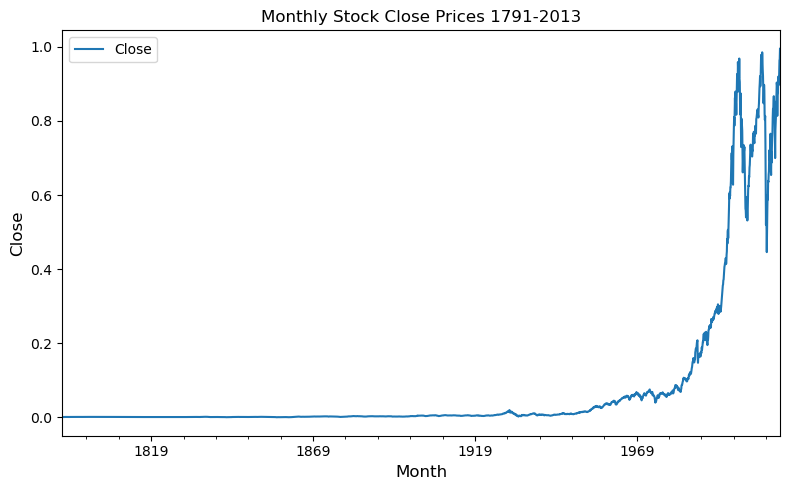

In [9]:
monthly_df['Close'].plot(title='Monthly Stock Close Prices 1791-2013',figsize=(8,5))
plt.ylabel('Close',fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.legend()

plt.tight_layout()

In [10]:
from statsmodels.tsa.stattools import adfuller

print ('Dickey-Fuller Test Results:')
dftest = adfuller(monthly_df.iloc[:,4].values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Dickey-Fuller Test Results:
Test Statistic                    2.600800
p-value                           0.999075
#Lags Used                       28.000000
Number of Observations Used    2632.000000
Critical Value (1%)              -3.432837
Critical Value (5%)              -2.862639
Critical Value (10%)             -2.567355
dtype: float64


In [11]:
monthly_df['Close'].head(10)

Date
1791-08-01    0.000947
1791-09-01    0.000645
1791-10-01    0.000751
1791-11-01    0.000669
1791-12-01    0.000745
1792-01-01    0.000839
1792-02-01    0.000712
1792-03-01    0.000746
1792-04-01    0.000881
1792-05-01    0.000849
Freq: MS, Name: Close, dtype: float64

In [12]:
monthly_df['Close'].nlargest(30)

Date
2013-04-01    0.994850
2007-10-01    0.985208
2007-06-01    0.978388
2000-09-01    0.968465
2007-07-01    0.967611
2013-03-01    0.966827
2013-02-01    0.963622
2007-11-01    0.960607
2000-04-01    0.959033
2007-09-01    0.948485
2007-05-01    0.946497
2007-12-01    0.937651
2000-07-01    0.935675
2000-05-01    0.934993
2007-08-01    0.933438
2013-01-01    0.931278
2000-01-01    0.926689
2000-06-01    0.922604
2008-01-01    0.921552
2007-02-01    0.920775
2012-10-01    0.919851
2000-08-01    0.915778
2000-10-01    0.914586
2012-11-01    0.909080
2007-04-01    0.907142
2000-11-01    0.905020
2012-04-01    0.903631
2007-01-01    0.902095
2012-12-01    0.897525
2008-05-01    0.897449
Name: Close, dtype: float64

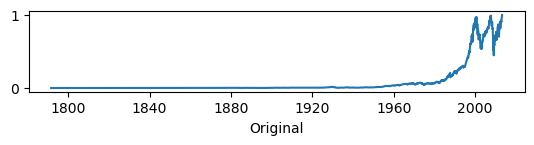

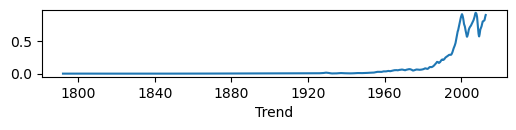

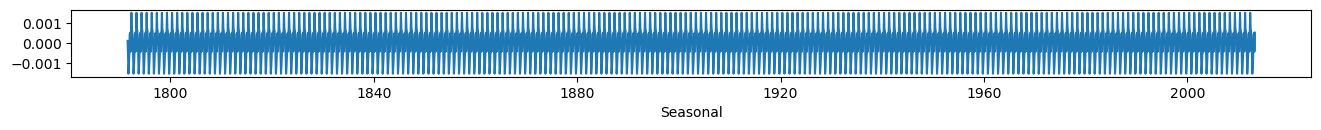

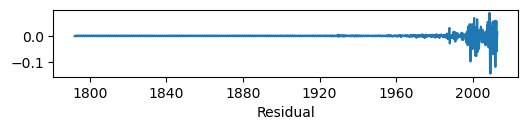

<Figure size 600x400 with 0 Axes>

In [13]:
monthly_decomp = seasonal_decompose(monthly_df['Close'], period=12)  

trend = monthly_decomp.trend
seasonal = monthly_decomp.seasonal
residual = monthly_decomp.resid

plt.subplot(411)
plt.plot(monthly_df['Close'])
plt.xlabel('Original')
plt.figure(figsize=(6,4))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(16,4))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,4))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,4))

plt.tight_layout()

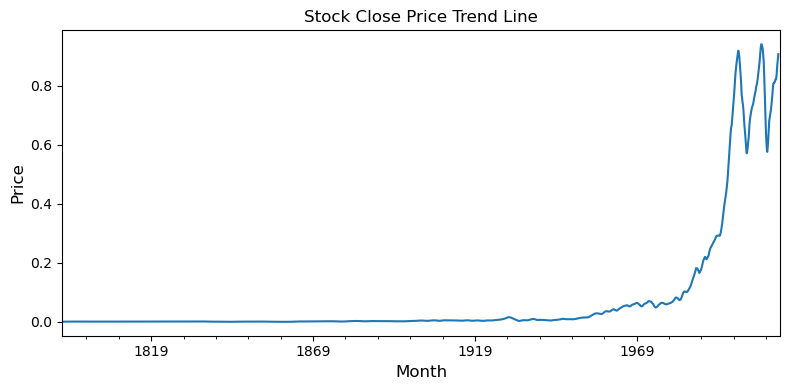

In [14]:
trend.plot(title='Stock Close Price Trend Line',figsize=(8,4)) 

plt.xlabel('Month',fontsize=12)
plt.ylabel('Price',fontsize=12)

plt.tight_layout()

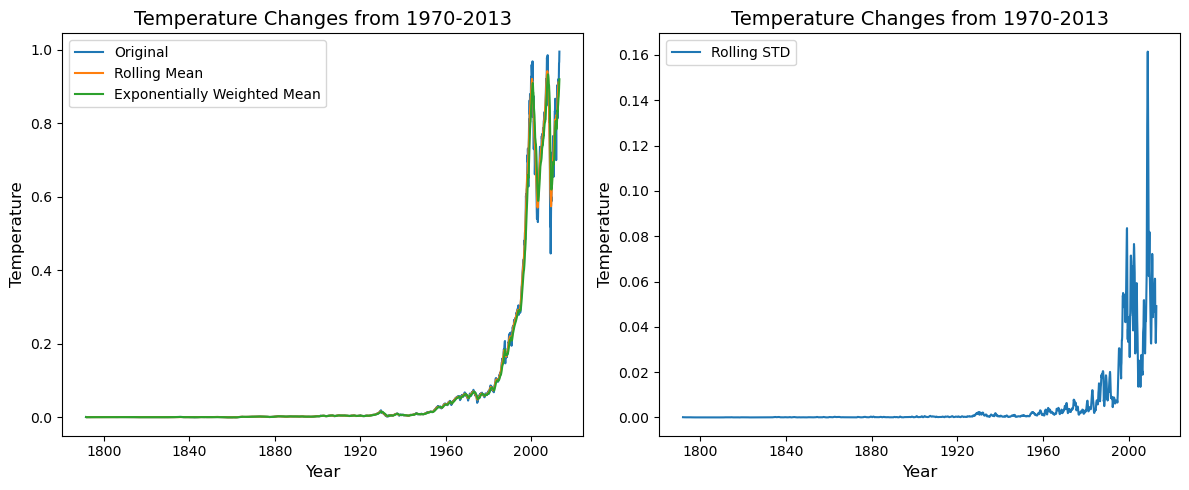

In [15]:
##Rolling mean 
temp_rol_mean = monthly_df['Close'].rolling(window=12, center=True).mean()

##Exponentially weighted mean 
temp_ewm = monthly_df['Close'].ewm(span=12).mean()

##Rolling standard deviation 
temp_rol_std = monthly_df['Close'].rolling(window=12, center=True).std()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(monthly_df['Close'],label='Original')
ax1.plot(temp_rol_mean,label='Rolling Mean')
ax1.plot(temp_ewm, label='Exponentially Weighted Mean')
ax1.set_title('Temperature Changes from 1970-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(temp_rol_std,label='Rolling STD')
ax2.set_title('Temperature Changes from 1970-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

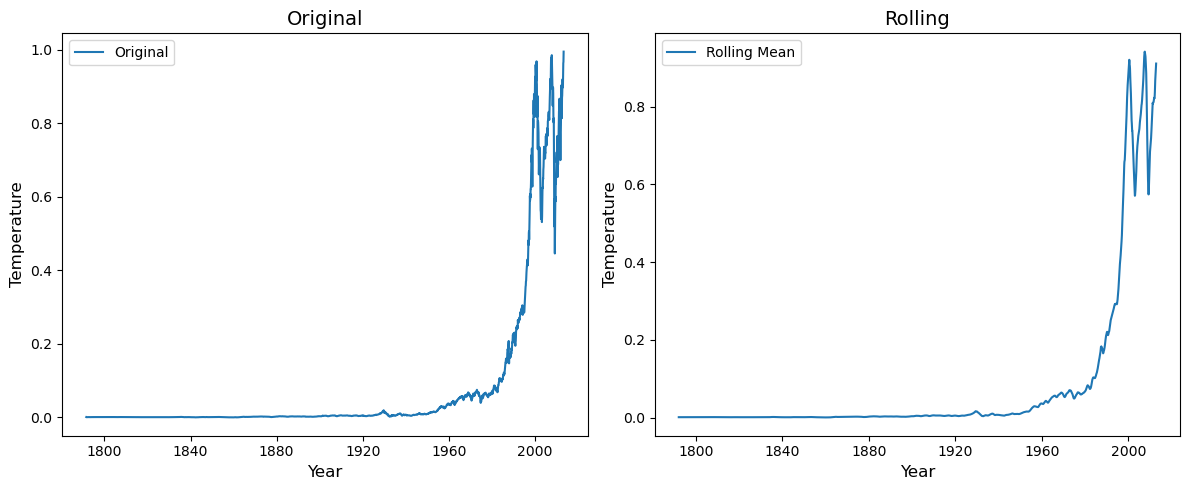

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.set_title('Original',fontsize=14)
ax1.plot(monthly_df['Close'],label='Original')
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.set_title('Rolling',fontsize=14)
ax2.plot(temp_rol_mean,label='Rolling Mean')
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

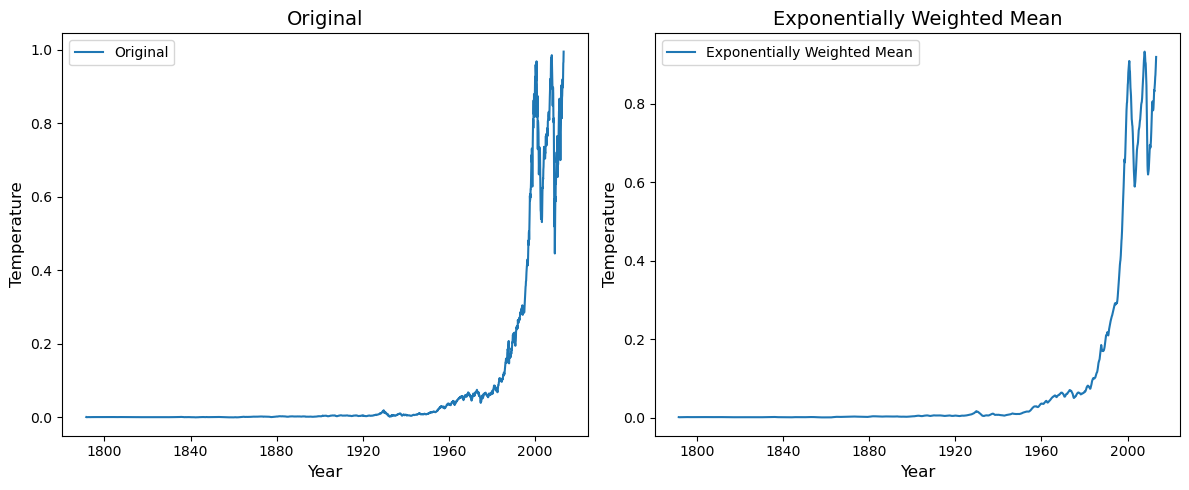

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.set_title('Original',fontsize=14)
ax1.plot(monthly_df['Close'],label='Original')
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.set_title('Exponentially Weighted Mean',fontsize=14)
ax2.plot(temp_ewm,label='Exponentially Weighted Mean')
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [18]:
temp_rol_mean.dropna(inplace=True)
temp_ewm.dropna(inplace=True)
print ('Dickey-Fuller Test for the Rolling Mean:')
dftest = adfuller(temp_rol_mean.values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

print ('')
print ('Dickey-Fuller Test for the Exponentially Weighted Mean:')
dftest = adfuller(temp_ewm.values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Dickey-Fuller Test for the Rolling Mean:
Test Statistic                    1.833995
p-value                           0.998414
#Lags Used                       28.000000
Number of Observations Used    2621.000000
Critical Value (1%)              -3.432847
Critical Value (5%)              -2.862643
Critical Value (10%)             -2.567357
dtype: float64

Dickey-Fuller Test for the Exponentially Weighted Mean:
Test Statistic                    2.463877
p-value                           0.999037
#Lags Used                       27.000000
Number of Observations Used    2633.000000
Critical Value (1%)              -3.432836
Critical Value (5%)              -2.862638
Critical Value (10%)             -2.567355
dtype: float64


In [19]:
diff_rol_mean = monthly_df['Close'] - temp_rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

Date
1792-02-01   -9.102274e-05
1792-03-01   -6.010760e-05
1792-04-01    4.806166e-05
1792-05-01    3.289900e-07
1792-06-01    3.472133e-05
Freq: MS, Name: Close, dtype: float64

In [20]:
diff_ewm = monthly_df['Close'] - temp_ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

Date
1791-08-01    0.000000
1791-09-01   -0.000138
1791-10-01   -0.000020
1791-11-01   -0.000069
1791-12-01    0.000005
Freq: MS, Name: Close, dtype: float64

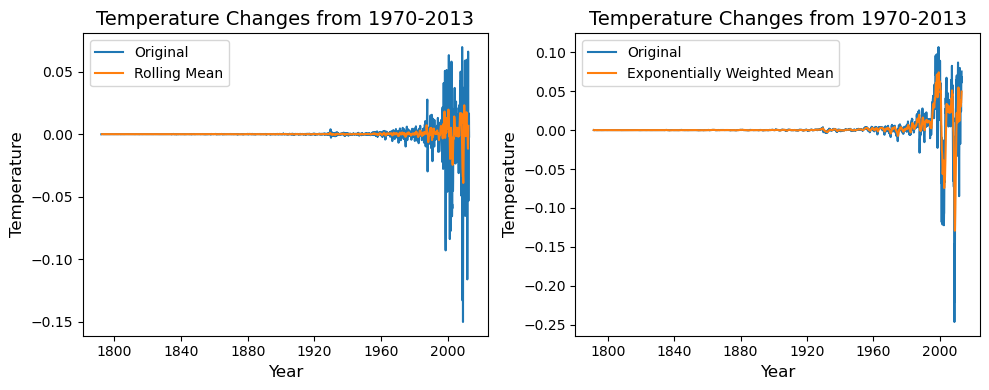

In [21]:
temp_rol_mean_diff = diff_rol_mean.rolling(window=12, center=True).mean()

temp_ewm_diff = diff_ewm.ewm(span=12).mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

ax1.plot(diff_rol_mean,label='Original')
ax1.plot(temp_rol_mean_diff,label='Rolling Mean')
ax1.set_title('Temperature Changes from 1970-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(diff_ewm,label='Original')
ax2.plot(temp_ewm_diff,label='Exponentially Weighted Mean')
ax2.set_title('Temperature Changes from 1970-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()

In [22]:
print ('Dickey-Fuller Test for the Difference between the Original and Rolling Mean:')
dftest = adfuller(diff_rol_mean.values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)
print ('')
print ('Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean:')
dftest = adfuller(diff_ewm.values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Dickey-Fuller Test for the Difference between the Original and Rolling Mean:
Test Statistic                -1.392280e+01
p-value                        5.258268e-26
#Lags Used                     2.700000e+01
Number of Observations Used    2.622000e+03
Critical Value (1%)           -3.432846e+00
Critical Value (5%)           -2.862643e+00
Critical Value (10%)          -2.567357e+00
dtype: float64

Dickey-Fuller Test for the Difference between the Original and Exponentially Weighted Mean:
Test Statistic                -7.235581e+00
p-value                        1.943510e-10
#Lags Used                     2.800000e+01
Number of Observations Used    2.632000e+03
Critical Value (1%)           -3.432837e+00
Critical Value (5%)           -2.862639e+00
Critical Value (10%)          -2.567355e+00
dtype: float64


In [23]:
temp_shift1 = monthly_df['Close'].shift(1)
temp_shift1.head()

Date
1791-08-01         NaN
1791-09-01    0.000947
1791-10-01    0.000645
1791-11-01    0.000751
1791-12-01    0.000669
Freq: MS, Name: Close, dtype: float64

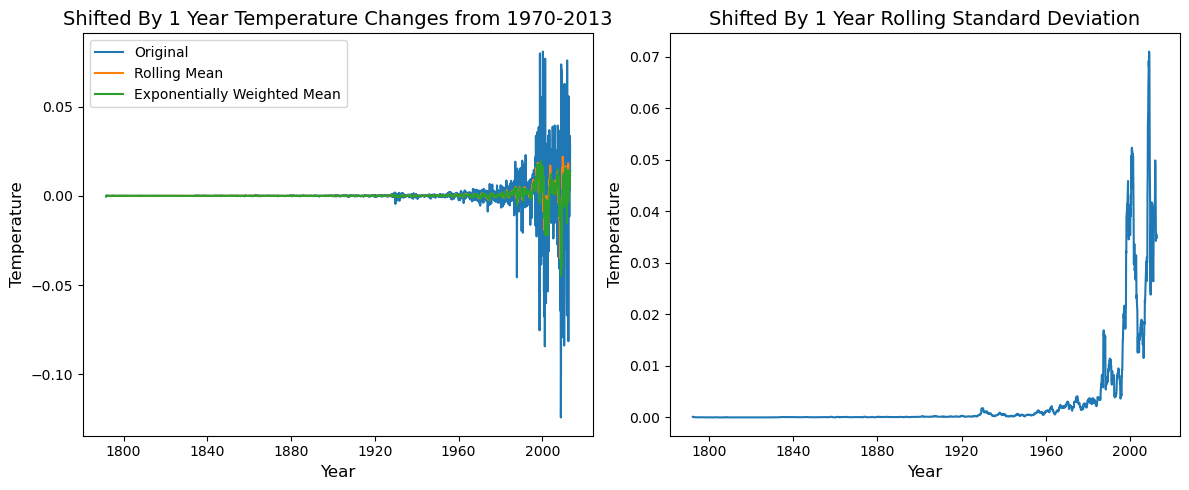

In [24]:
shift1_diff = monthly_df['Close'] - temp_shift1
shift1_diff.dropna(inplace=True)

temp_shift1_diff_rol_mean = shift1_diff.rolling(window=12, center=True).mean()

temp_shift1_diff_ewm = shift1_diff.ewm(span=12).mean()

temp_shift1_diff_rol_std = shift1_diff.rolling(window=12, center=True).std()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

ax1.plot(shift1_diff,label='Original')
ax1.plot(temp_shift1_diff_rol_mean,label='Rolling Mean')
ax1.plot(temp_shift1_diff_ewm,label='Exponentially Weighted Mean')
ax1.set_title('Shifted By 1 Year Temperature Changes from 1970-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()

ax2.plot(temp_shift1_diff_rol_std)
ax2.set_title('Shifted By 1 Year Rolling Standard Deviation',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)

plt.tight_layout()
plt.show()

In [25]:
print ('Dickey-Fuller Test for Difference between the Original and Shifted by 1 Year:')
dftest = adfuller(shift1_diff.values, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Dickey-Fuller Test for Difference between the Original and Shifted by 1 Year:
Test Statistic                -1.054785e+01
p-value                        8.323097e-19
#Lags Used                     2.800000e+01
Number of Observations Used    2.631000e+03
Critical Value (1%)           -3.432838e+00
Critical Value (5%)           -2.862639e+00
Critical Value (10%)          -2.567355e+00
dtype: float64


In [26]:
diff_rol_mean.isnull().sum()

0

In [27]:
type(diff_rol_mean)

pandas.core.series.Series

In [28]:
diff_rol_mean = diff_rol_mean.to_frame().rename(columns={0: 'Close'})
diff_rol_mean

,Close
Date,
1792-02-01,-9.102274e-05
1792-03-01,-6.010760e-05
1792-04-01,4.806166e-05
1792-05-01,3.289900e-07
1792-06-01,3.472133e-05
...,...
2012-07-01,-6.337618e-03
2012-08-01,-9.929979e-03
2012-09-01,-1.094597e-03


In [29]:
diff_rol_mean['Year'] = diff_rol_mean.index.year
diff_rol_mean['Month'] = diff_rol_mean.index.month
diff_rol_mean

,Close,Year,Month
Date,,,
1792-02-01,-9.102274e-05,1792,2
1792-03-01,-6.010760e-05,1792,3
1792-04-01,4.806166e-05,1792,4
1792-05-01,3.289900e-07,1792,5
1792-06-01,3.472133e-05,1792,6
...,...,...,...
2012-07-01,-6.337618e-03,2012,7
2012-08-01,-9.929979e-03,2012,8
2012-09-01,-1.094597e-03,2012,9


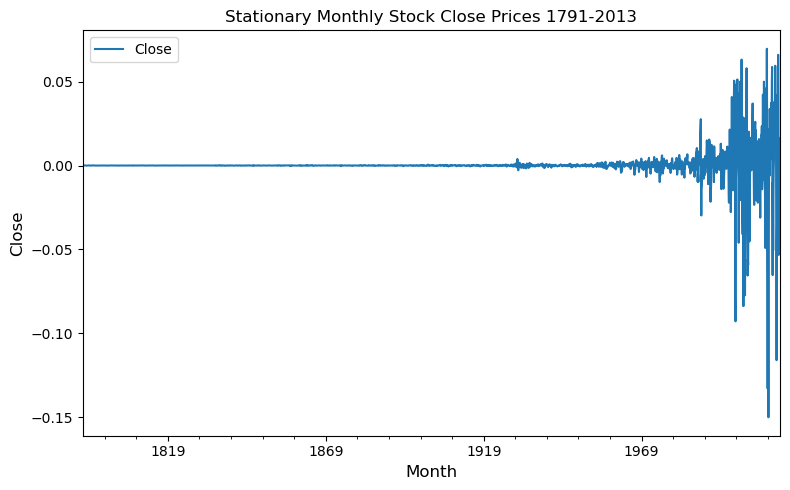

In [30]:
diff_rol_mean['Close'].plot(title='Stationary Monthly Stock Close Prices 1791-2013',figsize=(8,5))
plt.ylabel('Close',fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.legend()

plt.tight_layout()

In [31]:
# import sqlite3
# import os
# import pandas as pd
# import pickle

# # Assume monthly_df and diff_rol_mean are your DataFrames

# # Step 1: Serialize and store the DataFrames
# serialized_df1 = pickle.dumps(monthly_df)
# serialized_df2 = pickle.dumps(diff_rol_mean)

# # Step 3: Connect to SQLite database and store serialized dataframes
# conn = sqlite3.connect('DM_Project.db')
# cursor = conn.cursor()

# # Create table if not exists
# cursor.execute('''CREATE TABLE IF NOT EXISTS data_plot5 (
#                     id INTEGER AUTO_INCREMENT PRIMARY KEY,
#                     serialized_df1 BLOB,
#                     serialized_df2 BLOB)''')

# # Insert data into the table
# cursor.execute("INSERT INTO data_plot5 (serialized_df1, serialized_df2) VALUES (?, ?)",
#                (serialized_df1, serialized_df2))

# # Commit changes and close connection
# conn.commit()
# conn.close()


In [32]:
# import shutil

# # Specify the paths for the original and backup databases
# original_db_path = "DM_Project.db"
# backup_db_path = "DM_Project_Saved.db"  # Specify the directory where you want to save the backup

# # Copy the original database file to the backup directory
# shutil.copyfile(original_db_path, backup_db_path)

# print("Database saved successfully as:", backup_db_path)


Database saved successfully as: DM_Project_Saved_2.db


# ARIMA Model

In [31]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

C:\Users\wasif\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


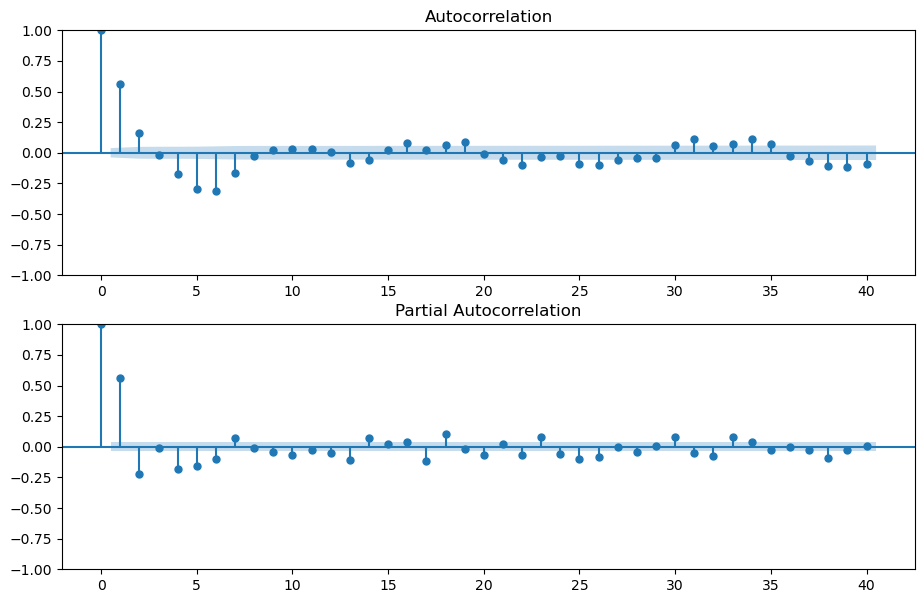

In [32]:
# Plotting ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(11, 7))
plot_acf(diff_rol_mean['Close'], ax=ax[0], lags=40)
plot_pacf(diff_rol_mean['Close'], ax=ax[1], lags=40)
plt.show()


In [52]:
# Defining the index or timestamp to split the data
split_index = 0.8 

# Splitting the data
train_data = diff_rol_mean['Close'][:int(split_index * len(monthly_df))]
test_data = diff_rol_mean['Close'][int(split_index * len(monthly_df)):]

In [53]:
model = ARIMA(train_data, order=(1, 1, 0))

model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2527
Model:                 ARIMA(1, 1, 0)   Log Likelihood                9221.839
Date:                Tue, 14 May 2024   AIC                         -18439.678
Time:                        15:33:38   BIC                         -18428.009
Sample:                    02-01-1792   HQIC                        -18435.444
                         - 08-01-2002                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1006      0.004    -27.904      0.000      -0.108      -0.094
sigma2      3.949e-05   1.75e-07    225.076      0.000    3.91e-05    3.98e-05
Ljung-Box (L1) (Q):                   1.12   Jarque-

In [55]:
forecast_values = model_fit.forecast(steps=len(test_data))
print('Forecasted values:', forecast_values)

Forecasted values: 2002-09-01   -0.061545
2002-10-01   -0.061954
2002-11-01   -0.061913
2002-12-01   -0.061917
2003-01-01   -0.061917
                ...   
2012-07-01   -0.061917
2012-08-01   -0.061917
2012-09-01   -0.061917
2012-10-01   -0.061917
2012-11-01   -0.061917
Freq: MS, Name: predicted_mean, Length: 123, dtype: float64


In [56]:
forecast_horizon = 10 
forecast_values2 = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

In [57]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(test_data, forecast_values))
print('RMSE:', rmse)

RMSE: 0.07161033576629797


In [58]:
test_data.describe()

count    123.000000
mean      -0.000098
std        0.036294
min       -0.150131
25%       -0.013666
50%        0.004493
75%        0.021137
max        0.069618
Name: Close, dtype: float64

In [59]:
rmse = np.sqrt(mean_squared_error(test_data, forecast_values2))
print('RMSE:', rmse)

RMSE: 0.07161033576629797


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


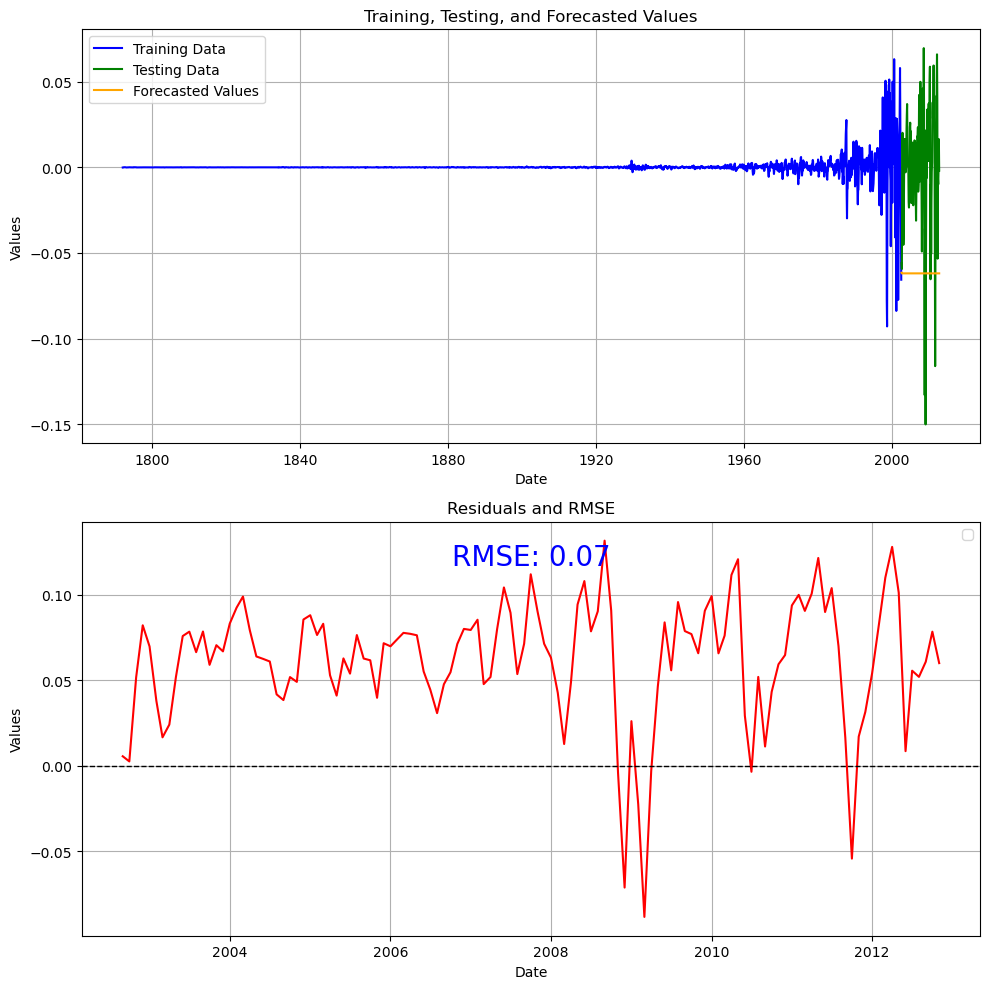

In [61]:
import matplotlib.pyplot as plt

# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plotting training, testing, and forecasted values
ax1.plot(train_data.index, train_data.values, label='Training Data', color='blue')
ax1.plot(test_data.index, test_data.values, label='Testing Data', color='green')
ax1.plot(test_data.index, forecast_values.values, label='Forecasted Values', color='orange')
ax1.set_title('Training, Testing, and Forecasted Values')
ax1.set_xlabel('Date')
ax1.set_ylabel('Values')
ax1.legend()
ax1.grid(True)

# Calculating residuals for the ARIMA model
arima_residuals = test_data.values - forecast_values.values

# Plotting residuals and RMSE
ax2.plot(test_data.index, arima_residuals, color='red')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax2.set_title('Residuals and RMSE')
ax2.set_xlabel('Date')
ax2.set_ylabel('Values')
ax2.legend()
ax2.grid(True)

# Adding RMSE value to the plot
ax2.text(0.5, 0.95, f'RMSE: {rmse:.2f}', horizontalalignment='center', verticalalignment='top', transform=ax2.transAxes, fontsize=20, color='blue')

plt.tight_layout()
plt.show()

In [92]:
type(forecast_values)

pandas.core.series.Series

In [94]:
# Serializing DataFrames and NumPy array
serialized_train_data = pickle.dumps(train_data)
serialized_test_data = pickle.dumps(test_data)
serialized_arima_residuals = pickle.dumps(arima_residuals)
serialized_forecast_values = pickle.dumps(forecast_values)

# Connecting to SQLite database
conn = sqlite3.connect('DM_Project.db')
cursor = conn.cursor()

# Creating table if not exists
cursor.execute('''CREATE TABLE IF NOT EXISTS arima_ploted (
                    id INTEGER AUTO_INCREMENT PRIMARY KEY,
                    train_data BLOB,
                    test_data BLOB,
                    arima_residuals BLOB,
                    forecast_values BLOB,
                    rmse FLOAT)''')

# Inserting data into the table
cursor.execute("INSERT INTO arima_ploted (train_data, test_data, arima_residuals, forecast_values, rmse) VALUES (?, ?, ?, ?, ?)",
               (serialized_train_data, serialized_test_data, serialized_arima_residuals, serialized_forecast_values, rmse))

# Committing changes and close connection
conn.commit()
conn.close()

## Future Forecasting:

In [48]:
model = ARIMA(diff_rol_mean['Close'], order=(1, 2, 3))

model_fit = model.fit()

forecast_horizon = len(diff_rol_mean)  
forecast_values = model_fit.forecast(steps=len(diff_rol_mean))

C:\Users\wasif\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\wasif\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\wasif\AppData\Local\Temp\ipykernel_5112\2444968233.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=diff_rol_mean.index[-1], periods=forecast_horizon + 1, freq='M')[1:]


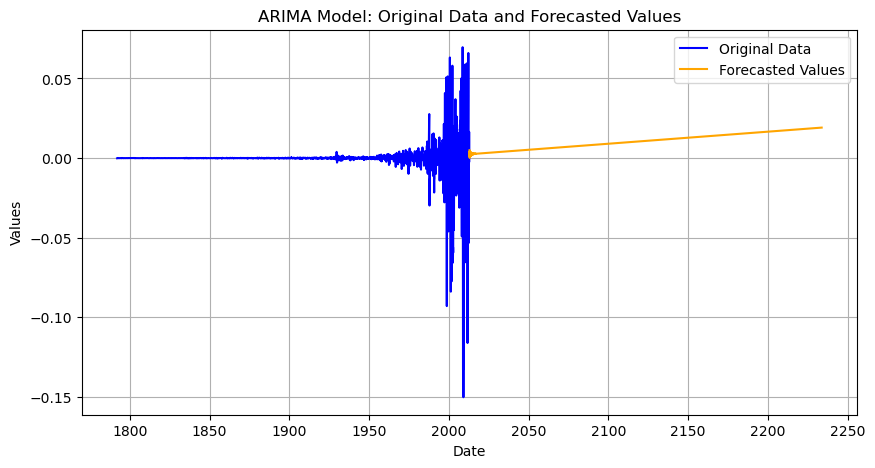

In [51]:
# Plotting the entire dataset and forecasted values
plt.figure(figsize=(10, 5))

# Plotting the entire dataset
plt.plot(diff_rol_mean.index, diff_rol_mean['Close'].values, label='Original Data', color='blue')

# Plotting forecasted values
forecast_index = pd.date_range(start=diff_rol_mean.index[-1], periods=forecast_horizon + 1, freq='M')[1:]
plt.plot(forecast_index, forecast_values, label='Forecasted Values', color='orange')

# Adding labels and legend
plt.title('ARIMA Model: Original Data and Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
type(forecast_values)

pandas.core.series.Series

## Storing in SQLite:

In [63]:
serialized_diff_rol_mean = pickle.dumps(diff_rol_mean)
serialized_forecast_values = pickle.dumps(forecast_values)

forecast_index_str = forecast_index.strftime('%Y-%m-%d').tolist()

conn = sqlite3.connect('DM_Project.db')
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS arima_forecastData (
                    id INTEGER AUTO_INCREMENT PRIMARY KEY,
                    diff_rol_mean BLOB,
                    forecast_index TEXT,
                    forecast_values BLOB)''')

cursor.execute("INSERT INTO arima_forecastData (diff_rol_mean, forecast_index, forecast_values) VALUES (?, ?, ?)",
               (serialized_diff_rol_mean, ','.join(forecast_index_str), serialized_forecast_values))

conn.commit()
conn.close()

In [95]:
import shutil

original_db_path = "DM_Project.db"
backup_db_path = "DM_Project_Saved.db"  

shutil.copyfile(original_db_path, backup_db_path)

print("Database saved successfully as:", backup_db_path)

Database saved successfully as: DM_Project_Saved.db


# ANN 

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [97]:
def create_model(layers, neurons, activation):
    model = Sequential()
    model.add(Dense(neurons[0], input_dim=X_train_scaled.shape[1], activation=activation))
    model.add(Dropout(0.2))
    
    for i in range(1, layers):
        model.add(Dense(neurons[i], activation=activation))
        model.add(Dropout(0.2))
    
    model.add(Dense(1))  # Output layer
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

# Features and target
X = diff_rol_mean[['Year', 'Month']].values
y = diff_rol_mean['Close'].values

# Defining the index or timestamp to split the data
split_index = 0.8  

# Splitting the data
split_point = int(split_index * len(monthly_df))
X_train = X[:split_point]
X_test = X[split_point:]
y_train = y[:split_point]
y_test = y[split_point:]

In [98]:
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining parameters for different architectures
architectures = [
    {'layers': 2, 'neurons': [128, 128], 'activation': 'relu'},
    {'layers': 3, 'neurons': [64, 64, 64], 'activation': 'relu'},
    {'layers': 4, 'neurons': [256, 128, 64, 32], 'activation': 'relu'}
]

C:\Users\wasif\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0074 - val_loss: 6.2455e-04
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0020 - val_loss: 3.9509e-04
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.2625e-04 - val_loss: 2.6459e-04
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0733e-04 - val_loss: 0.0012
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0703e-04 - val_loss: 2.5093e-04
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9344e-04 - val_loss: 3.8582e-04
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6228e-04 - val_loss: 1.8548e-04
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.2474e-05 - val_loss: 1.6448e-04
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.6289e-05 - val_loss: 1.2824e-04
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.8136e-05 - val_loss: 1.5267e-04
Architecture: {'layers': 2, 'neurons': [128, 128], 'activation': 'relu'}
Test loss: 0.0008

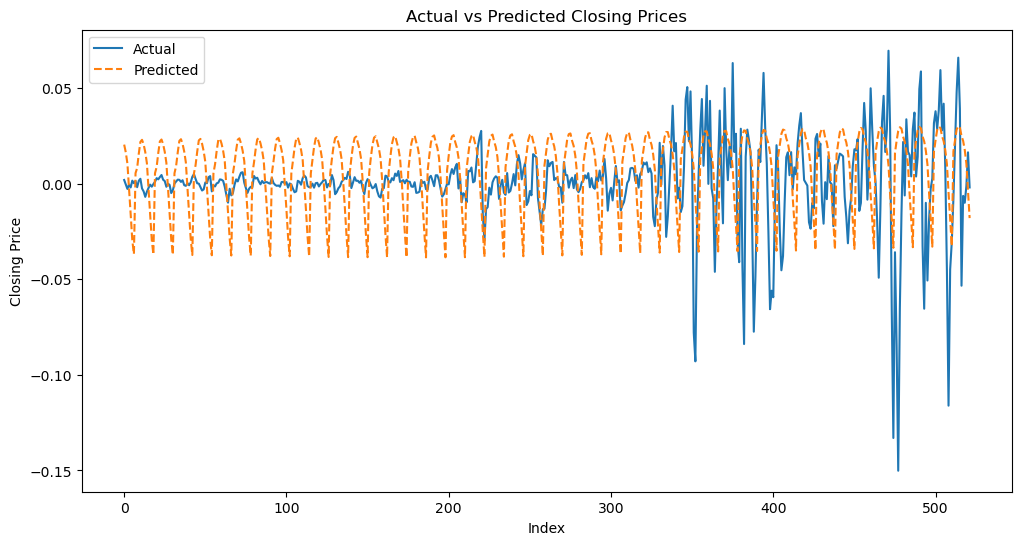

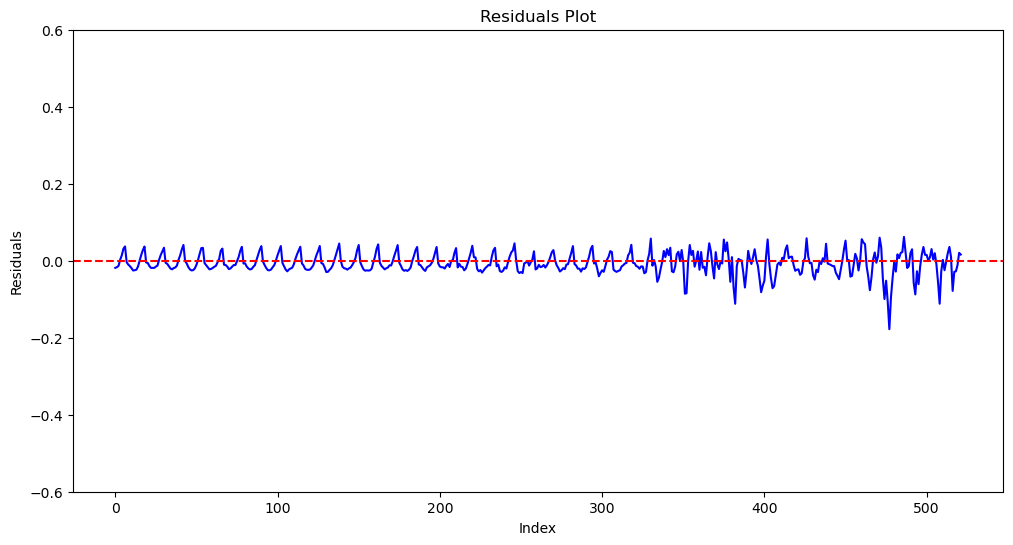

Epoch 1/10


C:\Users\wasif\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0067 - val_loss: 4.1011e-04
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 4.9962e-04
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.9132e-04 - val_loss: 1.6403e-04
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8302e-04 - val_loss: 1.1348e-04
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2511e-04 - val_loss: 4.1022e-05
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5668e-04 - val_loss: 2.3914e-05
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3280e-04 - val_loss: 2.3103e-05
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.4647e-05 - val_loss: 5.1548e-05
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.2751e-05 - val_loss: 2.9944e-05
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.9368e-05 - val_loss: 3.9142e-05
Architecture: {'layers': 3, 'neurons': [64, 64, 64], 'activation': 'relu'}
Test loss: 0.000694657

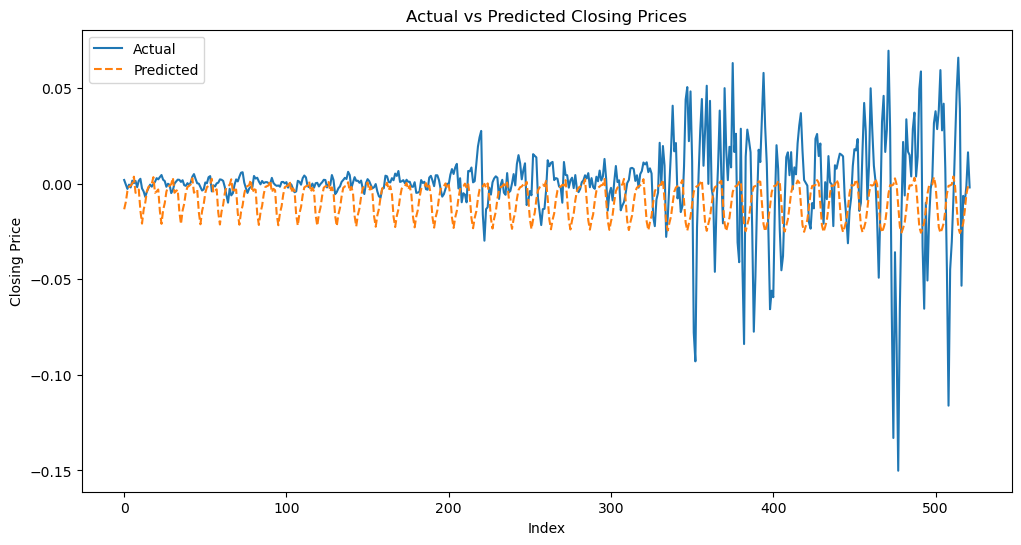

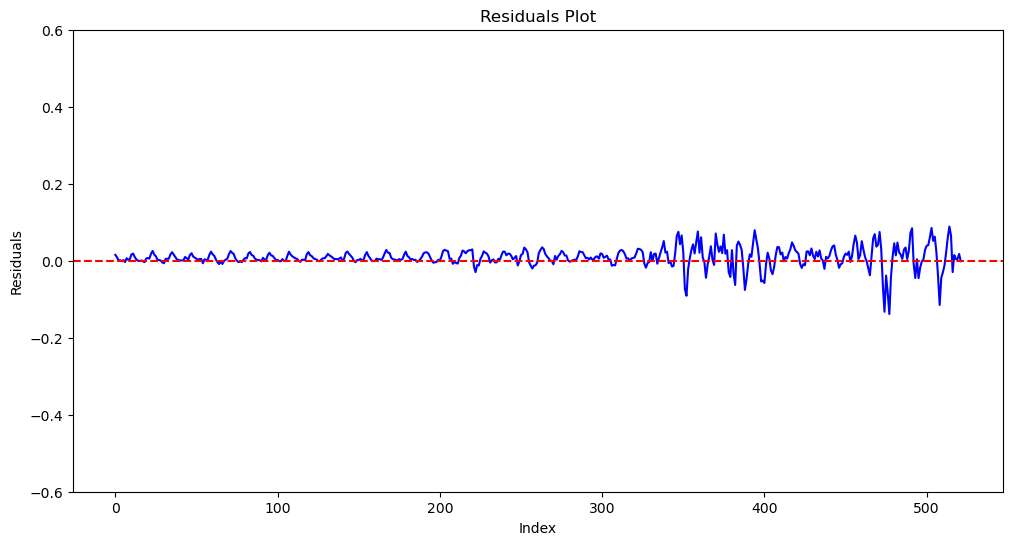

Epoch 1/10


C:\Users\wasif\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0025 - val_loss: 2.1155e-04
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1960e-04 - val_loss: 1.1623e-05
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7076e-05 - val_loss: 9.1771e-06
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4872e-05 - val_loss: 6.8963e-06
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3875e-05 - val_loss: 4.7343e-06
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0251e-06 - val_loss: 3.2129e-06
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2678e-06 - val_loss: 1.8740e-06
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.3768e-06 - val_loss: 1.5264e-06
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.4127e-06 - val_loss: 1.1552e-06
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.6869e-06 - val_loss: 1.2674e-06
Architecture: {'layers': 4, 'neurons': [256, 128, 64, 32], 'activation': 'relu'}
Test loss: 0

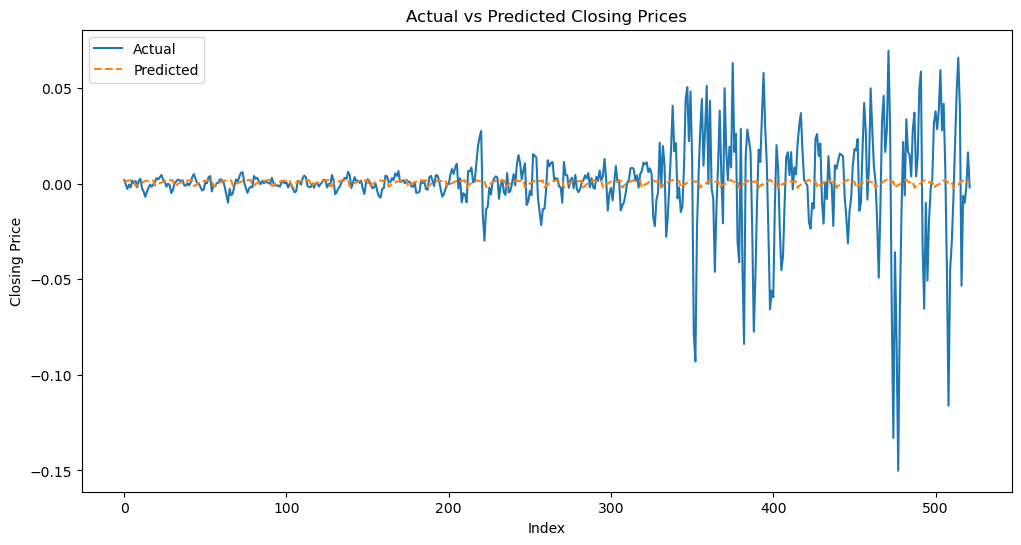

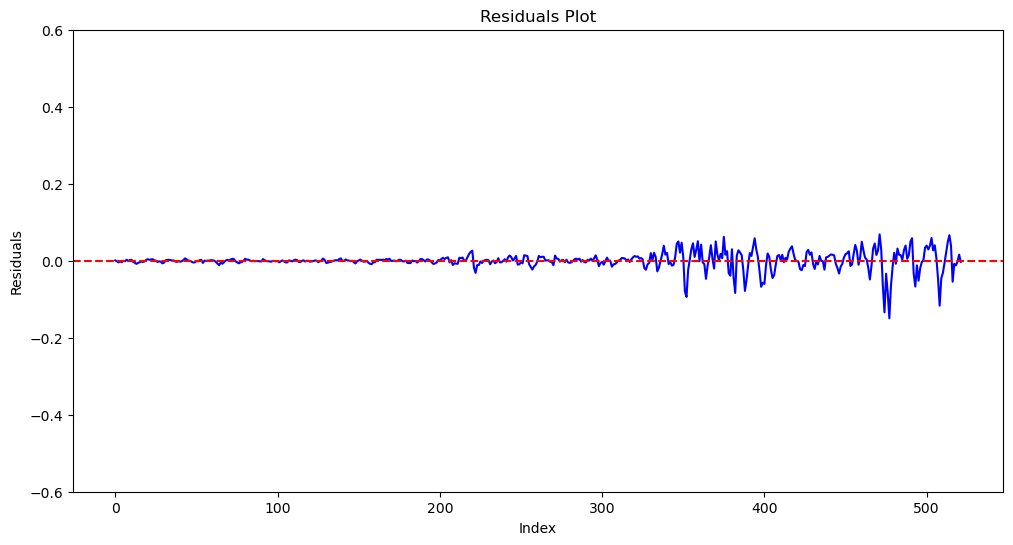

In [99]:
# Training and evaluating models with different architectures
for arch in architectures:
    model = create_model(arch['layers'], arch['neurons'], arch['activation'])
    history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.4, verbose=1)
    loss = model.evaluate(X_test_scaled, y_test, verbose=0)
    print('Architecture:', arch)
    print('Test loss:', loss)
    
    # Making predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculating RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('RMSE:', rmse)
    
    # Plotting the actual vs predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted', linestyle='--')
    plt.xlabel('Index')
    plt.ylabel('Closing Price')
    plt.title('Actual vs Predicted Closing Prices')
    plt.legend()
    plt.show()
    
    # Calculating residuals
    residuals = y_test - y_pred.flatten()
    
    # Plotting residuals
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(residuals)), residuals, color='blue')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals Plot')
    plt.xlabel('Index')
    plt.ylabel('Residuals')
    plt.ylim(-0.6, 0.6)
    plt.show()

In [100]:
diff_rol_mean.describe()

,Close,Year,Month
count,2650.000000,2650.000000,2650.000000
mean,0.000150,1902.000000,6.500000
std,0.009835,63.761068,3.450699
min,-0.150131,1792.000000,1.000000
25%,-0.000079,1847.000000,4.000000
50%,0.000004,1902.000000,6.500000
75%,0.000139,1957.000000,9.000000
max,0.069618,2012.000000,12.000000


In [101]:
architectures[0]['activation']

'relu'

Epoch 1/10


C:\Users\wasif\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0028 - val_loss: 1.6871e-04
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0322e-04 - val_loss: 7.8034e-05
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.2902e-05 - val_loss: 2.6107e-05
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4038e-05 - val_loss: 2.6263e-05
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0787e-05 - val_loss: 2.0223e-05
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9.5652e-06 - val_loss: 1.2716e-05
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.7177e-06 - val_loss: 8.7652e-06
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.5197e-06 - val_loss: 7.8361e-06
Epoch 9/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.6024e-06 - val_loss: 5.7956e-06
Epoch 10/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6487e-06 - val_loss: 4.5899e-06
Architecture: {'layers': 4, 'neurons': [256, 128, 64, 32], 'activation': 'relu'}
Test loss: 0

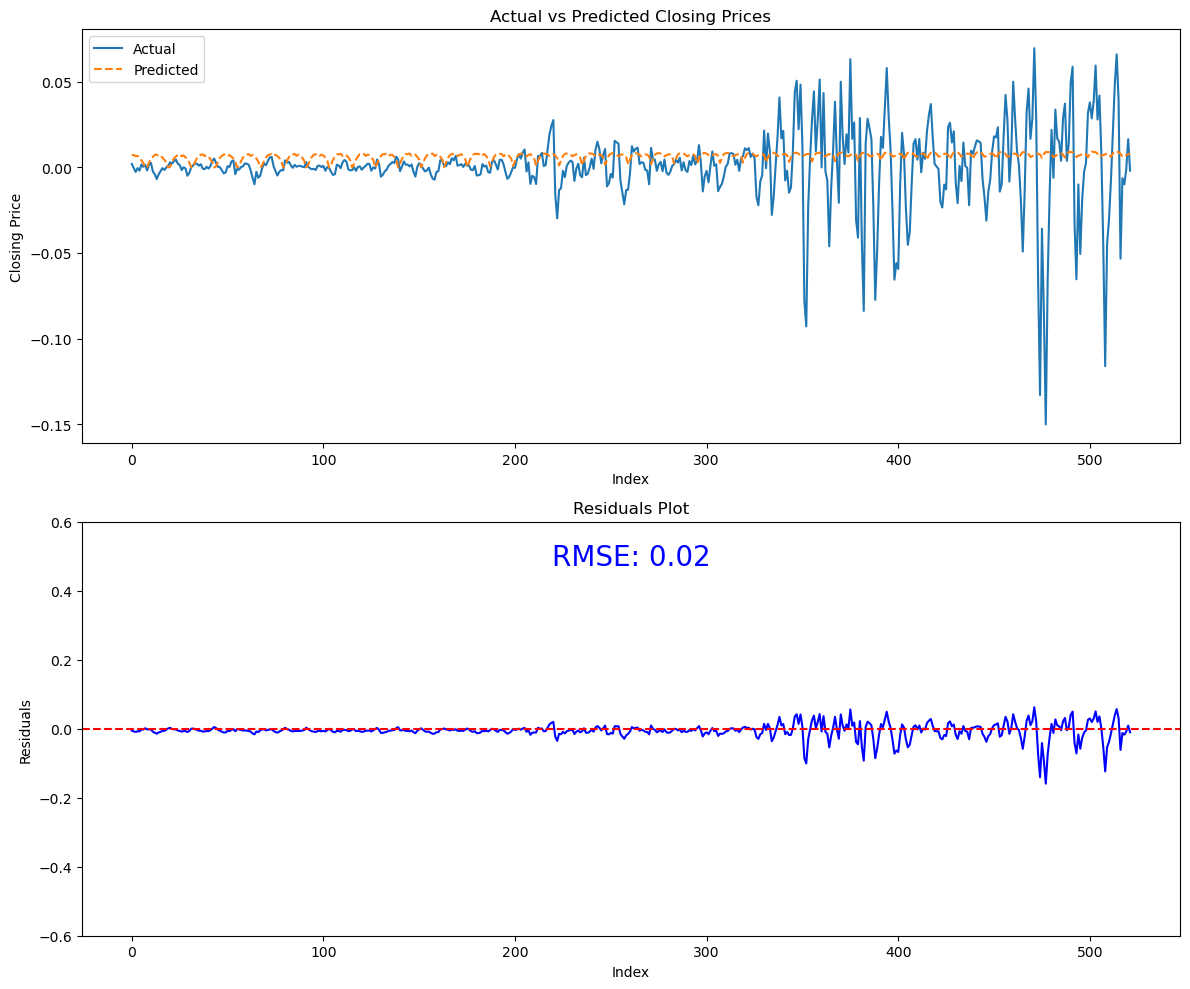

In [112]:
model = create_model(architectures[2]['layers'], architectures[2]['neurons'], architectures[2]['activation'])
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.4, verbose=1)
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print('Architecture:', arch)
print('Test loss:', loss)

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
ax1.plot(y_test, label='Actual')
ax1.plot(y_pred, label='Predicted', linestyle='--')
ax1.set_xlabel('Index')
ax1.set_ylabel('Closing Price')
ax1.set_title('Actual vs Predicted Closing Prices')
ax1.legend()

residuals = y_test - y_pred.flatten()

ax2.plot(range(len(residuals)), residuals, color='blue')
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_title('Residuals Plot')
ax2.set_xlabel('Index')
ax2.set_ylabel('Residuals')
ax2.set_ylim(-0.6, 0.6)
ax2.text(0.5, 0.95, f'RMSE: {rmse:.2f}', horizontalalignment='center', verticalalignment='top', transform=ax2.transAxes, fontsize=20, color='blue')
plt.tight_layout()

In [103]:
import sqlite3
import pickle
import numpy as np

serialized_y_test = pickle.dumps(y_test)
serialized_y_pred = pickle.dumps(y_pred)
serialized_residuals = pickle.dumps(residuals)

conn = sqlite3.connect('DM_Project.db')
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS ANN_ploted (
                    id INTEGER AUTO_INCREMENT PRIMARY KEY,
                    y_test BLOB,
                    y_pred BLOB,
                    residuals BLOB,
                    rmse FLOAT)''')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

cursor.execute("INSERT INTO ANN_ploted (y_test, y_pred, residuals, rmse) VALUES (?, ?, ?, ?)",
               (serialized_y_test, serialized_y_pred, serialized_residuals, rmse))

conn.commit()
conn.close()

In [104]:
import shutil

original_db_path = "DM_Project.db"
backup_db_path = "DM_Project_Saved.db" 

shutil.copyfile(original_db_path, backup_db_path)

print("Database saved successfully as:", backup_db_path)

Database saved successfully as: DM_Project_Saved.db


# Future Forecasting:

In [113]:
X = diff_rol_mean[['Year', 'Month']].values
y = diff_rol_mean['Close'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Defining model architecture and training it on the entire dataset
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_scaled.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_scaled, y, epochs=20, batch_size=32, verbose=1)

Epoch 1/20


C:\Users\wasif\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0064
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3177e-04
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.8873e-04
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3745e-04
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8815e-04
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4170e-04
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3468e-04
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1315e-04
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3548e-04
Epoch 10/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.5359e-05
Epoch 11/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.7607e-05
Epoch 12/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0334e-04
Epoch 13/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1101e-04
Epoch 14/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.0093e-05
Epoch 15/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3m

In [114]:
# Predicting future values
future_dates = pd.date_range(start=diff_rol_mean.index[-1], periods=len(diff_rol_mean), freq='M')
future_features = []
for date in future_dates:
    year = date.year
    month = date.month
    day = date.day
    future_features.append([year, month])

C:\Users\wasif\AppData\Local\Temp\ipykernel_5112\3864419896.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=diff_rol_mean.index[-1], periods=len(diff_rol_mean), freq='M')


In [116]:
future_features_scaled = scaler.transform(future_features)
future_predictions = model.predict(future_features_scaled)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


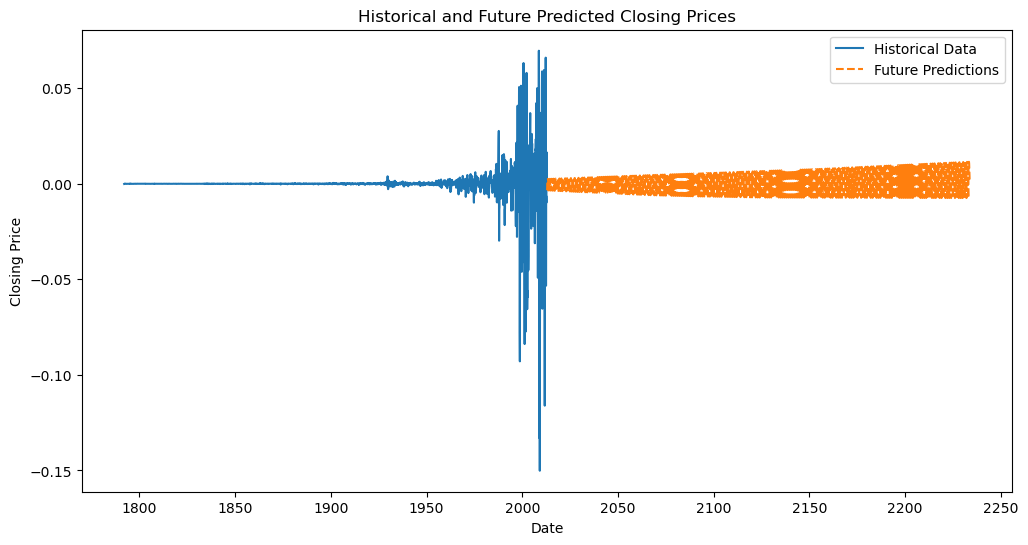

In [117]:
# Plotting future predictions
plt.figure(figsize=(12, 6))
plt.plot(diff_rol_mean.index, diff_rol_mean['Close'], label='Historical Data')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Historical and Future Predicted Closing Prices')
plt.legend()
plt.show()

In [120]:
import sqlite3
import pickle

serialized_diff_rol_mean = pickle.dumps(diff_rol_mean)
serialized_future_predictions = pickle.dumps(future_predictions)

future_dates_str = future_dates.strftime('%Y-%m-%d').tolist()

conn = sqlite3.connect('DM_Project.db')
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS ANN_forecasted (
                    id INTEGER PRIMARY KEY,
                    future_dates TEXT,
                    diff_rol_mean BLOB,
                    future_predictions BLOB)''')

cursor.execute("INSERT INTO ANN_forecasted (future_dates, diff_rol_mean, future_predictions) VALUES (?, ?, ?)",
               (','.join(future_dates_str), serialized_diff_rol_mean, serialized_future_predictions))

conn.commit()
conn.close()

In [121]:
import shutil

original_db_path = "DM_Project.db"
backup_db_path = "DM_Project_Saved.db" 

shutil.copyfile(original_db_path, backup_db_path)

print("Database saved successfully as:", backup_db_path)

Database saved successfully as: DM_Project_Saved.db


# Sarima

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [125]:
result = adfuller(diff_rol_mean['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -13.922797914099208
p-value: 5.258268480418409e-26


C:\Users\wasif\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


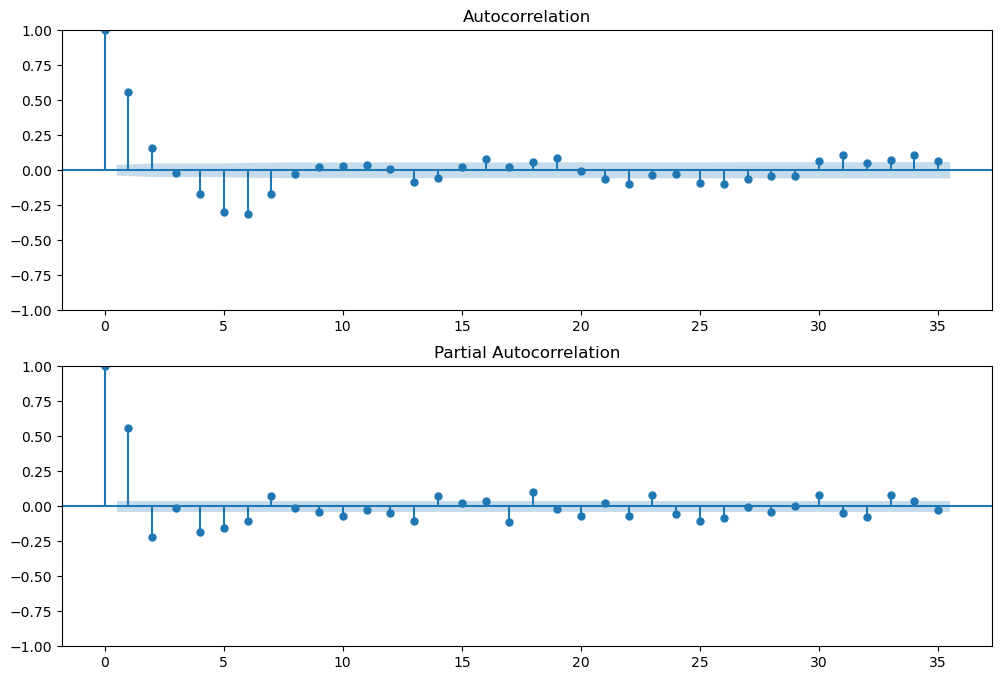

In [126]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(diff_rol_mean['Close'], ax=ax[0])
plot_pacf(diff_rol_mean['Close'], ax=ax[1])
plt.show()

In [127]:
# Defining the index or timestamp to split the data
split_index = 0.8 

# Splitting the data
train_data = diff_rol_mean['Close'][:int(split_index * len(monthly_df))]
test_data = diff_rol_mean['Close'][int(split_index * len(monthly_df)):]

In [128]:
# Fitting the SARIMA model
sarima_model = SARIMAX(train_data, order=(1, 1, 0))  # No seasonal_order since the data is not seasonal
results = sarima_model.fit()

forecast = results.forecast(steps=len(test_data))

C:\Users\wasif\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [129]:
forecast

1969-06-01    0.001958
1969-07-01    0.001961
1969-08-01    0.001960
1969-09-01    0.001960
1969-10-01    0.001960
                ...   
2012-07-01    0.001960
2012-08-01    0.001960
2012-09-01    0.001960
2012-10-01    0.001960
2012-11-01    0.001960
Freq: MS, Name: predicted_mean, Length: 522, dtype: float64

In [130]:
# Calculating RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print('RMSE:', rmse)

RMSE: 0.022161035580995872


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


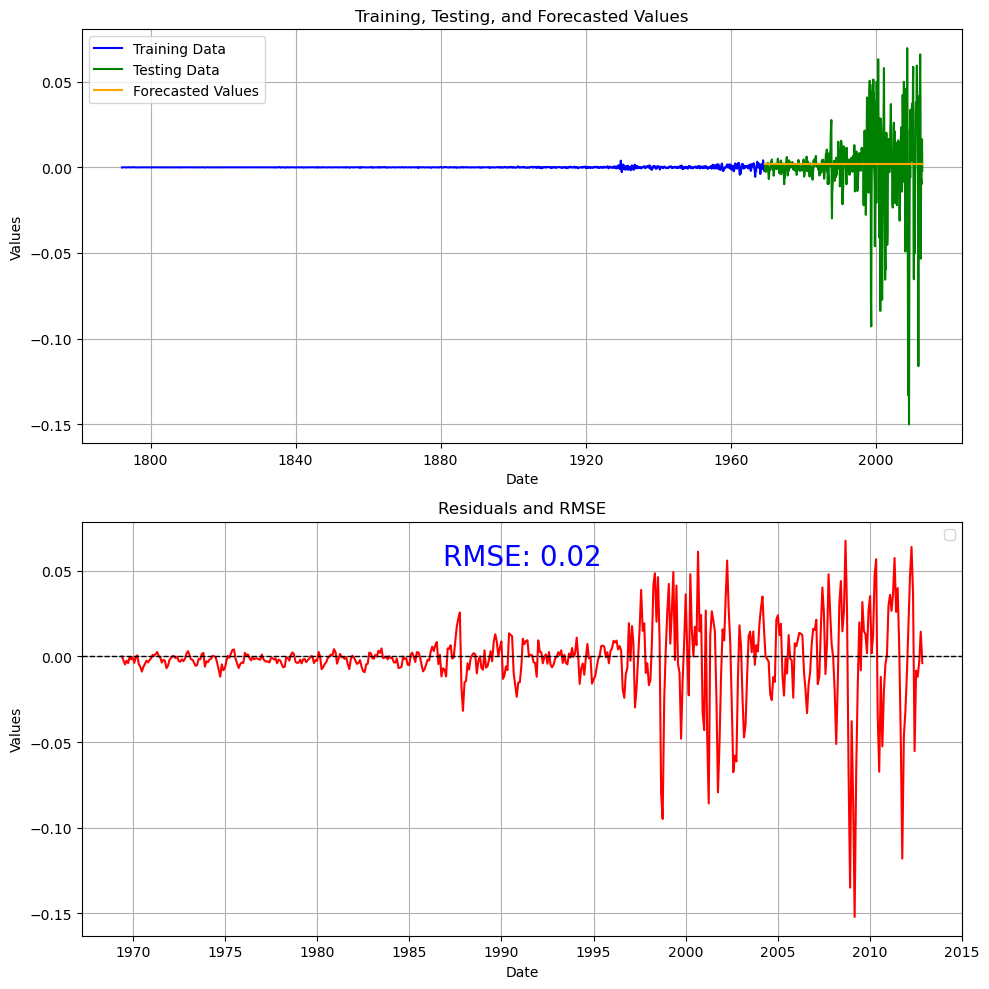

In [131]:
import matplotlib.pyplot as plt

# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plotting training, testing, and forecasted values
ax1.plot(train_data.index, train_data.values, label='Training Data', color='blue')
ax1.plot(test_data.index, test_data.values, label='Testing Data', color='green')
ax1.plot(test_data.index, forecast.values, label='Forecasted Values', color='orange')
ax1.set_title('Training, Testing, and Forecasted Values')
ax1.set_xlabel('Date')
ax1.set_ylabel('Values')
ax1.legend()
ax1.grid(True)

# Calculating residuals for the ARIMA model
sarima_residuals = test_data.values - forecast.values

# Plotting residuals and RMSE
ax2.plot(test_data.index, sarima_residuals, color='red')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax2.set_title('Residuals and RMSE')
ax2.set_xlabel('Date')
ax2.set_ylabel('Values')
ax2.legend()
ax2.grid(True)

# Adding RMSE value to the plot
ax2.text(0.5, 0.95, f'RMSE: {rmse:.2f}', horizontalalignment='center', verticalalignment='top', transform=ax2.transAxes, fontsize=20, color='blue')

plt.tight_layout()
plt.show()

In [132]:
import sqlite3
import pickle

serialized_train_data = pickle.dumps(train_data)
serialized_test_data = pickle.dumps(test_data)
serialized_forecast = pickle.dumps(forecast)
serialized_sarima_residuals = pickle.dumps(sarima_residuals)

conn = sqlite3.connect('DM_Project.db')
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS sarima_plots (
                    id INTEGER PRIMARY KEY,
                    train_data BLOB,
                    test_data BLOB,
                    forecast BLOB,
                    sarima_residuals BLOB,
                    rmse FLOAT)''')

cursor.execute("INSERT INTO sarima_plots (train_data, test_data, forecast, sarima_residuals, rmse) VALUES (?, ?, ?, ?, ?)",
               (serialized_train_data, serialized_test_data, serialized_forecast, serialized_sarima_residuals, rmse))

conn.commit()
conn.close()

In [133]:
import shutil

original_db_path = "DM_Project.db"
backup_db_path = "DM_Project_Saved.db"  

shutil.copyfile(original_db_path, backup_db_path)

print("Database saved successfully as:", backup_db_path)

Database saved successfully as: DM_Project_Saved.db


## Future Forecasting:

In [143]:
# Fitting the SARIMA model
sarima_model = SARIMAX(diff_rol_mean['Close'], order=(2, 1, 0))  # No seasonal_order since the data is not seasonal
results = sarima_model.fit()

forecast_horizon = len(diff_rol_mean)
forecast = results.forecast(steps=len(diff_rol_mean))

C:\Users\wasif\AppData\Local\Temp\ipykernel_5112\58705672.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=diff_rol_mean.index[-1], periods=forecast_horizon + 1, freq='M')[1:]


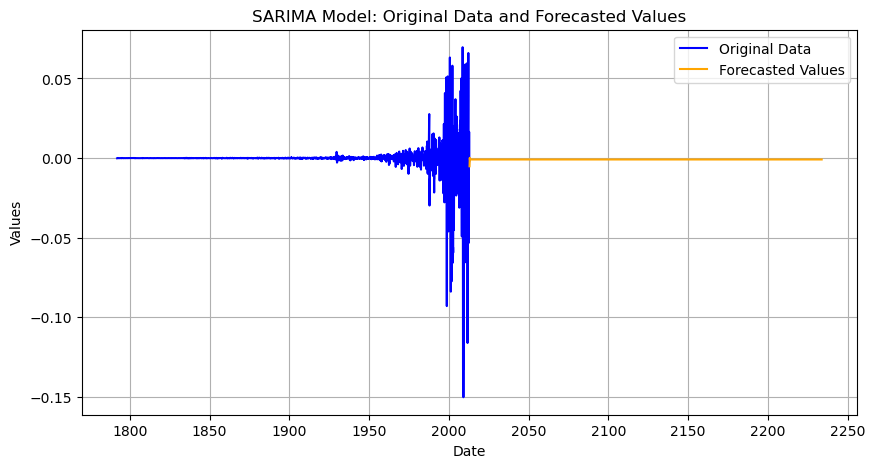

In [144]:
# Plotting the entire dataset and forecasted values
plt.figure(figsize=(10, 5))

# Plotting the entire dataset
plt.plot(diff_rol_mean.index, diff_rol_mean['Close'].values, label='Original Data', color='blue')

# Plotting forecasted values
forecast_index = pd.date_range(start=diff_rol_mean.index[-1], periods=forecast_horizon + 1, freq='M')[1:]
plt.plot(forecast_index, forecast, label='Forecasted Values', color='orange')

# Adding labels and legend
plt.title('SARIMA Model: Original Data and Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [145]:
import sqlite3
import pickle

serialized_diff_rol_mean = pickle.dumps(diff_rol_mean)
serialized_forecast_index = pickle.dumps(forecast_index)
serialized_forecast = pickle.dumps(forecast)

conn = sqlite3.connect('DM_Project.db')
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS sarima_forecastData (
                    id INTEGER PRIMARY KEY,
                    diff_rol_mean BLOB,
                    forecast_index BLOB,
                    forecast BLOB)''')

cursor.execute("INSERT INTO sarima_forecastData (diff_rol_mean, forecast_index, forecast) VALUES (?, ?, ?)",
               (serialized_diff_rol_mean, serialized_forecast_index, serialized_forecast))

conn.commit()
conn.close()

In [146]:
import shutil

original_db_path = "DM_Project.db"
backup_db_path = "DM_Project_Saved.db"  

shutil.copyfile(original_db_path, backup_db_path)

print("Database saved successfully as:", backup_db_path)

Database saved successfully as: DM_Project_Saved.db


# Exponential Smoothing

In [147]:
split_index = 0.8  

train_data = diff_rol_mean['Close'][:int(split_index * len(monthly_df))]
test_data = diff_rol_mean['Close'][int(split_index * len(monthly_df)):]

In [148]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fitting the ETS model
ets_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
results = ets_model.fit()

results.summary()

Dep. Variable:,Close,No. Observations:,2128
Model:,ExponentialSmoothing,SSE,0.000
Optimized:,True,AIC,-32676.986
Trend:,Additive,BIC,-32586.379
Seasonal:,Additive,AICC,-32676.662
Seasonal Periods:,12,Date:,"Mon, 13 May 2024"
Box-Cox:,False,Time:,20:49:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9242857,alpha,True
smoothing_trend,9.9974e-05,beta,True


In [149]:
ETS_forecast = results.forecast(steps=len(test_data))
print(ETS_forecast)

1969-06-01    0.001501
1969-07-01    0.001599
1969-08-01    0.001868
1969-09-01    0.001736
1969-10-01    0.001604
                ...   
2012-07-01    0.002150
2012-08-01    0.002419
2012-09-01    0.002286
2012-10-01    0.002154
2012-11-01    0.002284
Freq: MS, Length: 522, dtype: float64


In [150]:
# Calculating RMSE
rmse = np.sqrt(mean_squared_error(test_data, ETS_forecast))
print('RMSE:', rmse)

RMSE: 0.022156585206253424


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


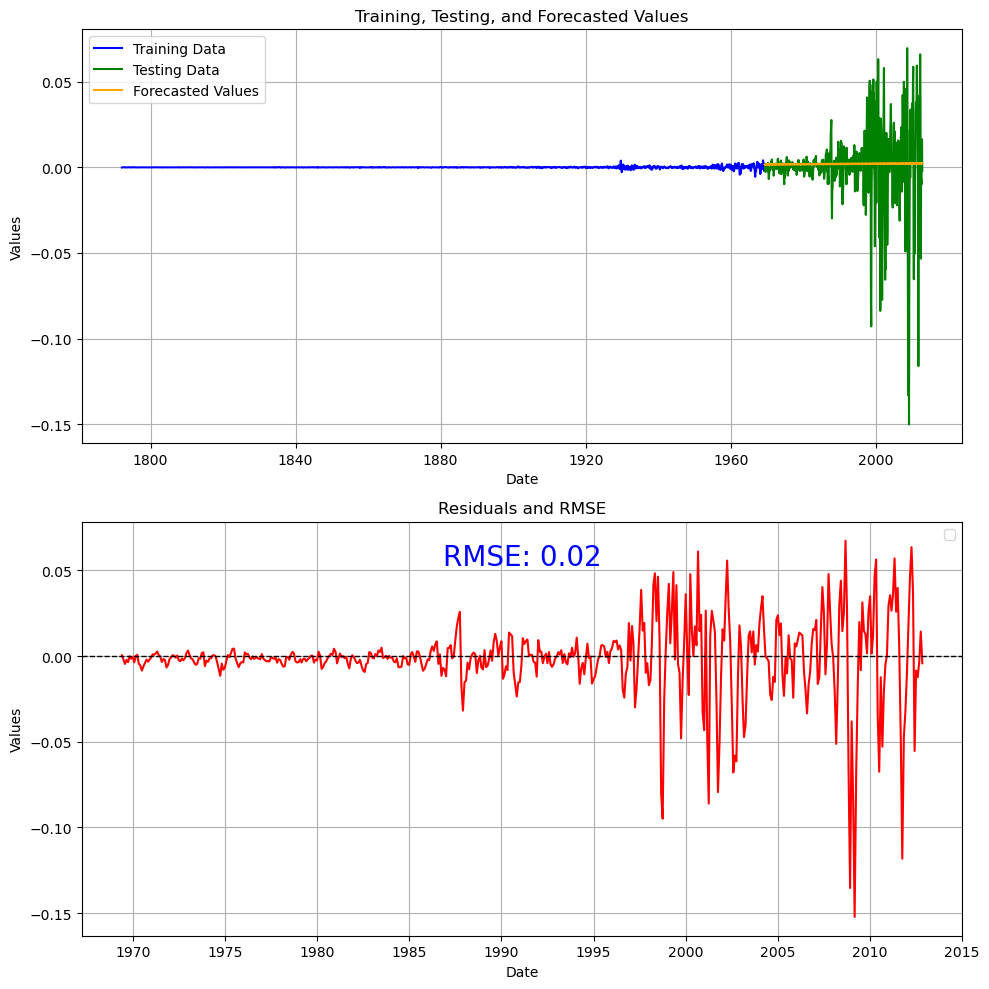

In [151]:
import matplotlib.pyplot as plt

# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plotting training, testing, and forecasted values
ax1.plot(train_data.index, train_data.values, label='Training Data', color='blue')
ax1.plot(test_data.index, test_data.values, label='Testing Data', color='green')
ax1.plot(test_data.index, ETS_forecast.values, label='Forecasted Values', color='orange')
ax1.set_title('Training, Testing, and Forecasted Values')
ax1.set_xlabel('Date')
ax1.set_ylabel('Values')
ax1.legend()
ax1.grid(True)

# Calculating residuals for the ARIMA model
ETS_residuals = test_data.values - ETS_forecast.values

# Plotting residuals and RMSE
ax2.plot(test_data.index, ETS_residuals, color='red')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax2.set_title('Residuals and RMSE')
ax2.set_xlabel('Date')
ax2.set_ylabel('Values')
ax2.legend()
ax2.grid(True)

# Adding RMSE value to the plot
ax2.text(0.5, 0.95, f'RMSE: {rmse:.2f}', horizontalalignment='center', verticalalignment='top', transform=ax2.transAxes, fontsize=20, color='blue')

plt.tight_layout()
plt.show()

In [152]:
import sqlite3
import pickle

serialized_train_data = pickle.dumps(train_data)
serialized_test_data = pickle.dumps(test_data)
serialized_ETS_forecast = pickle.dumps(ETS_forecast)
serialized_ETS_residuals = pickle.dumps(ETS_residuals)

conn = sqlite3.connect('DM_Project.db')
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS ets_plots (
                    id INTEGER PRIMARY KEY,
                    train_data BLOB,
                    test_data BLOB,
                    ets_forecast BLOB,
                    ets_residuals BLOB,
                    rmse FLOAT)''')

cursor.execute("INSERT INTO ets_plots (train_data, test_data, ets_forecast, ets_residuals, rmse) VALUES (?, ?, ?, ?, ?)",
               (serialized_train_data, serialized_test_data, serialized_ETS_forecast, serialized_ETS_residuals, rmse))

conn.commit()
conn.close()

In [153]:
import shutil

original_db_path = "DM_Project.db"
backup_db_path = "DM_Project_Saved.db"  

shutil.copyfile(original_db_path, backup_db_path)

print("Database saved successfully as:", backup_db_path)

Database saved successfully as: DM_Project_Saved.db


# Future Forecasting:

In [155]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fitting the ETS model
ets_model = ExponentialSmoothing(diff_rol_mean['Close'], trend='add', seasonal='add', seasonal_periods=12)
results = ets_model.fit()

results.summary()

Dep. Variable:,Close,No. Observations:,2650
Model:,ExponentialSmoothing,SSE,0.222
Optimized:,True,AIC,-24840.335
Trend:,Additive,BIC,-24746.218
Seasonal:,Additive,AICC,-24840.075
Seasonal Periods:,12,Date:,"Mon, 13 May 2024"
Box-Cox:,False,Time:,20:57:04
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8535746,alpha,True
smoothing_trend,9.99e-05,beta,True


In [156]:
ETS_forecast = results.forecast(steps=len(diff_rol_mean))
print(ETS_forecast)

2012-12-01    0.004880
2013-01-01    0.010959
2013-02-01    0.004609
2013-03-01   -0.001891
2013-04-01    0.007868
                ...   
2233-05-01    0.075917
2233-06-01    0.064813
2233-07-01    0.067144
2233-08-01    0.065602
2233-09-01    0.062625
Freq: MS, Length: 2650, dtype: float64


In [ ]:
forecast_horizon = len(diff_rol_mean)

C:\Users\wasif\AppData\Local\Temp\ipykernel_5112\3469110721.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=diff_rol_mean.index[-1], periods=forecast_horizon + 1, freq='M')[1:]


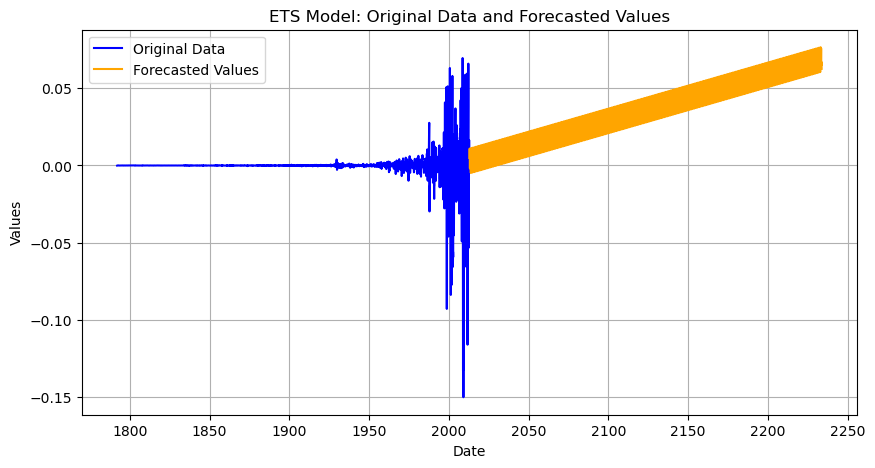

In [157]:
# Plotting the entire dataset and forecasted values
plt.figure(figsize=(10, 5))

# Plotting the entire dataset
plt.plot(diff_rol_mean.index, diff_rol_mean['Close'].values, label='Original Data', color='blue')

# Plotting forecasted values
forecast_index = pd.date_range(start=diff_rol_mean.index[-1], periods=forecast_horizon + 1, freq='M')[1:]
plt.plot(forecast_index, ETS_forecast, label='Forecasted Values', color='orange')

# Adding labels and legend
plt.title('ETS Model: Original Data and Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [159]:
import sqlite3
import pickle
import pandas as pd

serialized_diff_rol_mean = pickle.dumps(diff_rol_mean)
serialized_forecast_index = pickle.dumps(forecast_index)
serialized_ETS_forecast = pickle.dumps(ETS_forecast)

forecast_index_str = forecast_index.strftime('%Y-%m-%d').tolist()

conn = sqlite3.connect('DM_Project.db')
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS ets_forecastData (
                    id INTEGER PRIMARY KEY,
                    diff_rol_mean BLOB,
                    forecast_index TEXT,
                    ETS_forecast BLOB)''')

cursor.execute("INSERT INTO ets_forecastData (diff_rol_mean, forecast_index, ETS_forecast) VALUES (?, ?, ?)",
               (serialized_diff_rol_mean, ','.join(forecast_index_str), serialized_ETS_forecast))

conn.commit()
conn.close()

In [160]:
import shutil

original_db_path = "DM_Project.db"
backup_db_path = "DM_Project_Saved.db"  

shutil.copyfile(original_db_path, backup_db_path)

print("Database saved successfully as:", backup_db_path)

Database saved successfully as: DM_Project_Saved.db


# Prophet

In [58]:
import pandas as pd
from prophet import Prophet
import sqlite3
import pickle
import matplotlib.pyplot as plt

In [59]:
# Preparing the dataframe for Prophet
df_prophet = diff_rol_mean.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])  

# Splitting the data into training and testing sets
train_size = int(len(df_prophet) * 0.8)
train_df = df_prophet.iloc[:train_size]
test_df = df_prophet.iloc[train_size:]

# Initializing the Prophet model with monthly seasonality
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='additive'
)
model.add_seasonality(name='monthly', period=30.5, fourier_order=12)

# Training the Prophet model on the training data
model.fit(train_df)

19:44:28 - cmdstanpy - INFO - Chain [1] start processing
19:44:28 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
from sklearn.metrics import mean_squared_error

# Creating a dataframe to hold the dates for future predictions
future = model.make_future_dataframe(periods=len(test_df), freq='MS')
forecast = model.predict(future)

# Evaluating the model on the testing data
test_forecast = forecast.iloc[-len(test_df):]
rmse = mean_squared_error(test_df['y'], test_forecast['yhat'], squared=False)
print(f'Test RMSE: {rmse}')

Test RMSE: 0.021958233472057963


In [61]:
# Calculating residuals
residuals = test_df['y'] - test_forecast['yhat']

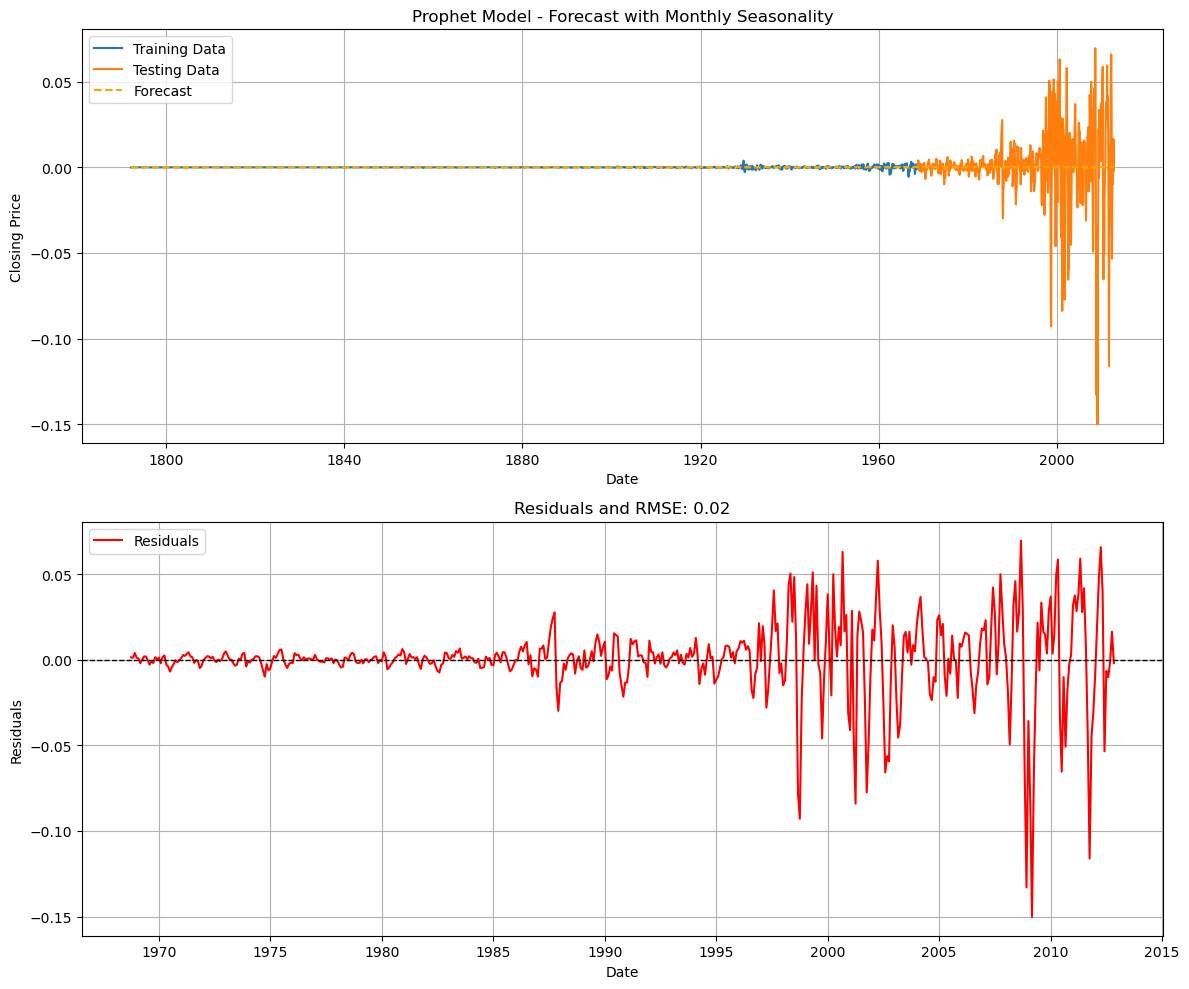

In [62]:
# Plotting the historical data and forecast with residuals and RMSE
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plotting historical data and forecast
ax1.plot(train_df['ds'], train_df['y'], label='Training Data')
ax1.plot(test_df['ds'], test_df['y'], label='Testing Data')
ax1.plot(forecast['ds'], forecast['yhat'], label='Forecast', linestyle='--', color='orange')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price')
ax1.set_title('Prophet Model - Forecast with Monthly Seasonality')
ax1.legend()
ax1.grid(True)

# Plotting residuals
ax2.plot(test_df['ds'], residuals, label='Residuals', color='red')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax2.set_xlabel('Date')
ax2.set_ylabel('Residuals')
ax2.set_title(f'Residuals and RMSE: {rmse:.2f}')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [67]:
import sqlite3
import pickle

serialized_train_df = pickle.dumps(train_df)
serialized_test_df = pickle.dumps(test_df)
serialized_residuals = pickle.dumps(residuals)
serialized_forecast = pickle.dumps(forecast)
serialized_rmse = pickle.dumps(rmse)

conn = sqlite3.connect('DM_Project.db')
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS Prophet_data (
                    id INTEGER PRIMARY KEY,
                    train_df BLOB,
                    test_df BLOB,
                    residuals BLOB,
                    forecast BLOB,
                    rmse REAL)''')

cursor.execute("INSERT INTO Prophet_data (train_df, test_df, residuals, forecast, rmse) VALUES (?, ?, ?, ?, ?)",
               (serialized_train_df, serialized_test_df, serialized_residuals, serialized_forecast, rmse))

conn.commit()
conn.close()

In [68]:
import shutil

original_db_path = "DM_Project.db"
backup_db_path = "DM_Project_Saved.db"  

shutil.copyfile(original_db_path, backup_db_path)

print("Database saved successfully as:", backup_db_path)

Database saved successfully as: DM_Project_Saved.db


## Future Forecasting:

In [69]:
# Initializing the Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    seasonality_mode='additive'
)

# Adding monthly seasonality
model.add_seasonality(name='monthly', period=30.5, fourier_order=12)

# Training the Prophet model
model.fit(df_prophet)

19:59:46 - cmdstanpy - INFO - Chain [1] start processing
19:59:46 - cmdstanpy - INFO - Chain [1] done processing


In [74]:
# Creating a dataframe to hold the dates for future predictions
future = model.make_future_dataframe(periods=len(df_prophet)) 
forecast = model.predict(future)

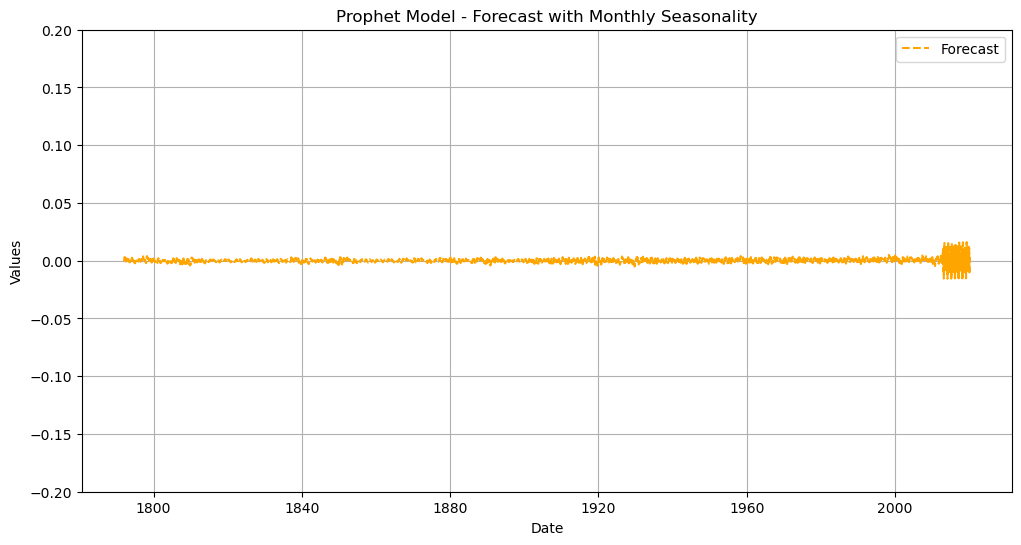

In [75]:
# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', linestyle='--', color='orange')
plt.title('Prophet Model - Forecast with Monthly Seasonality')
plt.xlabel('Date')
plt.ylabel('Values')
plt.grid(True)
plt.ylim(-0.2, 0.2)  
plt.legend()
plt.show()

In [76]:
import sqlite3
import pickle

serialized_forecast_dates = pickle.dumps(forecast['ds'].values)
serialized_forecast_values = pickle.dumps(forecast['yhat'].values)

conn = sqlite3.connect('DM_Project.db')
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS Prophet_forecasted (
                    id INTEGER PRIMARY KEY,
                    forecast_dates BLOB,
                    forecast_values BLOB)''')

cursor.execute("INSERT INTO Prophet_forecasted (forecast_dates, forecast_values) VALUES (?, ?)",
               (serialized_forecast_dates, serialized_forecast_values))

conn.commit()
conn.close()

In [77]:
import shutil

original_db_path = "DM_Project.db"
backup_db_path = "DM_Project_Saved.db"  

shutil.copyfile(original_db_path, backup_db_path)

print("Database saved successfully as:", backup_db_path)

Database saved successfully as: DM_Project_Saved.db


# Support Vector Regression (SVR)

In [161]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [162]:
# Features and target
X = diff_rol_mean[['Year', 'Month']].values
y = diff_rol_mean['Close'].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [163]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [164]:
# Defining SVR model
svr = SVR()

# Defining parameter grid for grid search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],  # Choosing appropriate kernels
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Performing grid search with cross-validation
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters found by grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Using the best parameters to train SVR model
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
best_svr.fit(X_train_scaled, y_train)

Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


SVR(C=1, gamma='auto')

In [169]:
# Making predictions
y_pred = best_svr.predict(X_test_scaled)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.0005274240045035003


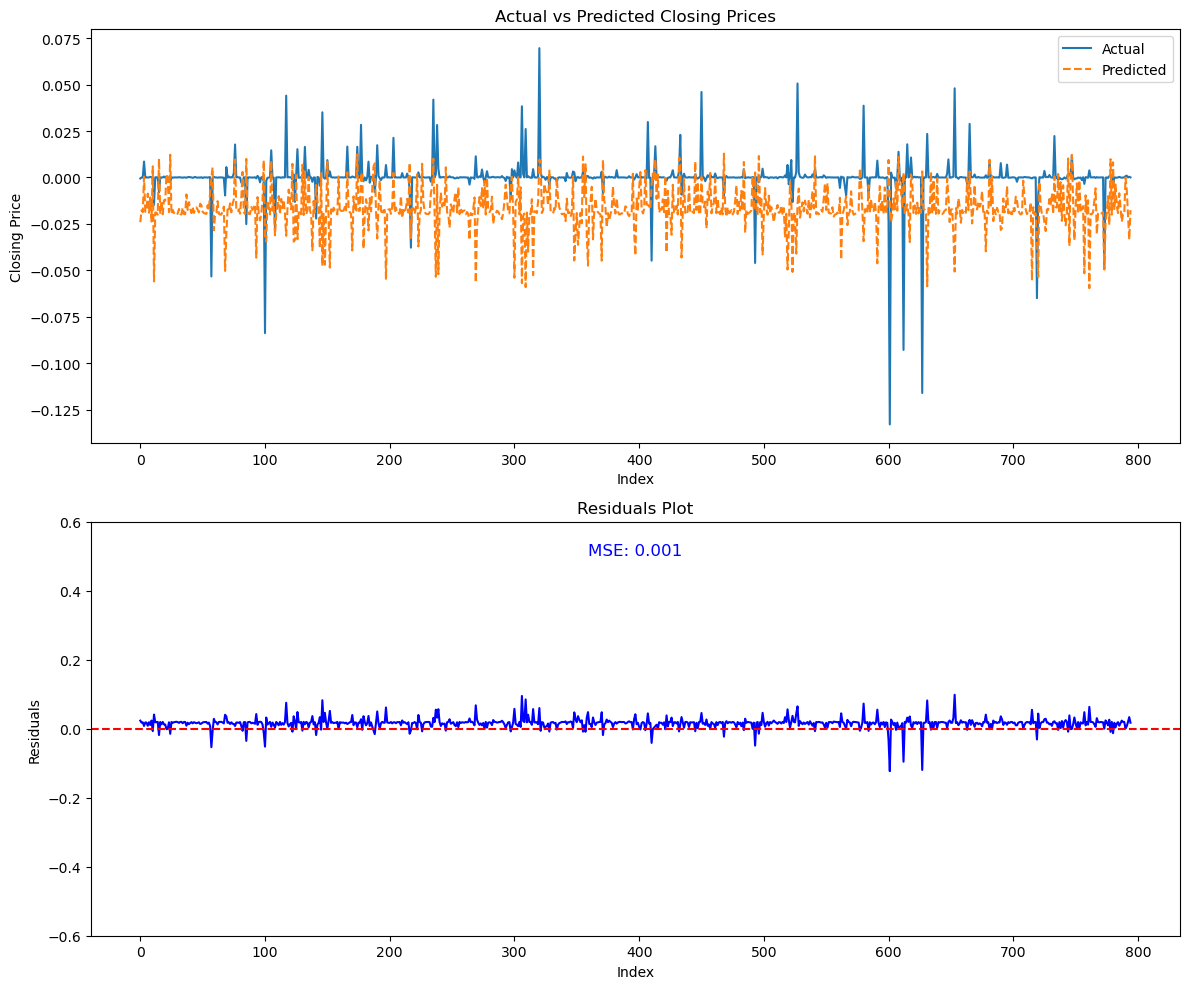

In [178]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plotting actual vs predicted values
ax1.plot(y_test, label='Actual')
ax1.plot(y_pred, label='Predicted', linestyle='--')
ax1.set_xlabel('Index')
ax1.set_ylabel('Closing Price')
ax1.set_title('Actual vs Predicted Closing Prices')
ax1.legend()

# Calculating residuals
residuals = y_test - y_pred.flatten()

# Plotting residuals
ax2.plot(range(len(residuals)), residuals, color='blue')
ax2.axhline(y=0, color='red', linestyle='--')
ax2.set_title('Residuals Plot')
ax2.set_xlabel('Index')
ax2.set_ylabel('Residuals')
ax2.set_ylim(-0.6, 0.6)

# Adding RMSE value to the plot
ax2.text(0.5, 0.95, f'MSE: {mse:.3f}', horizontalalignment='center', verticalalignment='top', transform=ax2.transAxes, fontsize=12, color='blue')

plt.tight_layout()
plt.show()

In [181]:
import sqlite3
import pickle

serialized_y_test = pickle.dumps(y_test)
serialized_y_pred = pickle.dumps(y_pred)
serialized_residuals = pickle.dumps(residuals)

conn = sqlite3.connect('DM_Project.db')
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS SVR_ploted (
                    id INTEGER PRIMARY KEY,
                    y_test BLOB,
                    y_pred BLOB,
                    residuals BLOB,
                    mse FLOAT)''')

cursor.execute("INSERT INTO SVR_ploted (y_test, y_pred, residuals, mse) VALUES (?, ?, ?, ?)",
               (serialized_y_test, serialized_y_pred, serialized_residuals, mse))

conn.commit()
conn.close()

In [182]:
import shutil

original_db_path = "DM_Project.db"
backup_db_path = "DM_Project_Saved.db"  

shutil.copyfile(original_db_path, backup_db_path)

print("Database saved successfully as:", backup_db_path)

Database saved successfully as: DM_Project_Saved.db


## Future Forecasting:

In [183]:
# Features and target
X = diff_rol_mean[['Year', 'Month']].values
y = diff_rol_mean['Close'].values

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Defining SVR model with the best parameters found by grid search
best_svr = SVR(kernel='rbf', C=10, gamma='scale')  # Using the best parameters obtained from cross-validation
best_svr.fit(X_scaled, y)

SVR(C=10)

In [186]:
# Predicting future values
future_dates = pd.date_range(start=monthly_df.index[-1], periods=len(diff_rol_mean), freq='M')
future_features = []
for date in future_dates:
    year = date.year
    month = date.month
    future_features.append([year, month])

future_features_scaled = scaler.transform(future_features)
future_predictions = best_svr.predict(future_features_scaled)

C:\Users\wasif\AppData\Local\Temp\ipykernel_5112\1745446840.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=monthly_df.index[-1], periods=len(diff_rol_mean), freq='M')


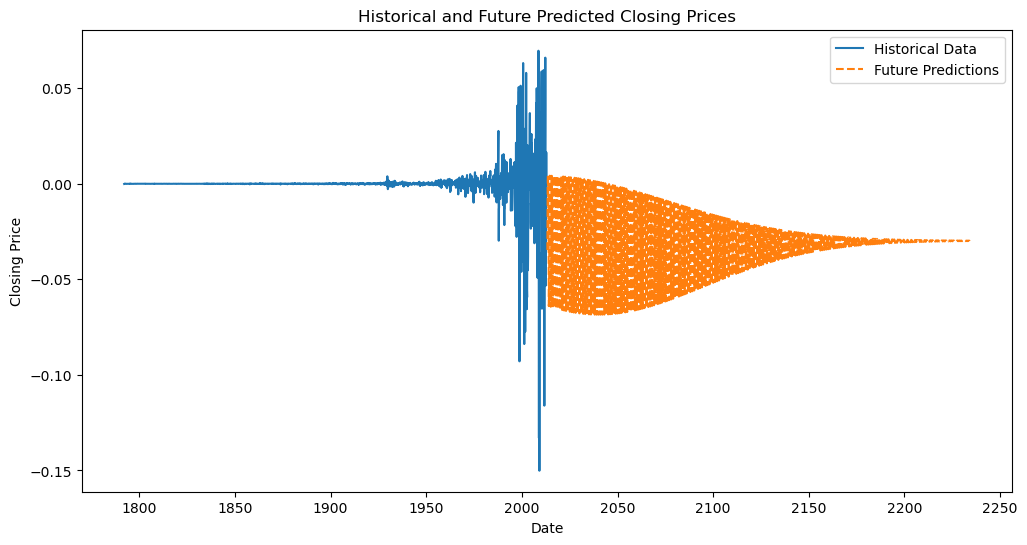

In [187]:
# Plotting future predictions
plt.figure(figsize=(12, 6))
plt.plot(diff_rol_mean.index, y, label='Historical Data')
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Historical and Future Predicted Closing Prices')
plt.legend()
plt.show()

In [190]:
import sqlite3
import pickle

serialized_y = pickle.dumps(y)
serialized_diff_rol_mean_index = pickle.dumps(diff_rol_mean.index)
serialized_future_dates = pickle.dumps(future_dates)
serialized_future_predictions = pickle.dumps(future_predictions)

conn = sqlite3.connect('DM_Project.db')
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS SVR_forecast (
                    id INTEGER PRIMARY KEY,
                    y BLOB,
                    diff_rol_mean_index BLOB,
                    future_dates BLOB,
                    future_predictions BLOB)''')

cursor.execute("INSERT INTO SVR_forecast (y, diff_rol_mean_index, future_dates, future_predictions) VALUES (?, ?, ?, ?)",
               (serialized_y, serialized_diff_rol_mean_index, serialized_future_dates, serialized_future_predictions))

conn.commit()
conn.close()

In [192]:
import shutil

original_db_path = "DM_Project.db"
backup_db_path = "DM_Project_Saved.db"  

shutil.copyfile(original_db_path, backup_db_path)

print("Database saved successfully as:", backup_db_path)

Database saved successfully as: DM_Project_Saved.db


# Long Short-Term Memory (LSTM)

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(diff_rol_mean[['Close']])

# Converting the series to supervised learning
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)


seq_length = 8  # 
X, y = create_sequences(diff_rol_mean['Close'], seq_length)

# Splitting the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

C:\Users\wasif\AppData\Local\Temp\ipykernel_16000\618455759.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y.append(data[i + seq_length])


In [33]:
# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Fiting the model
early_stop = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

Epoch 1/20


C:\Users\wasif\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 1.6510e-05 - val_loss: 4.8236e-04
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.3598e-07 - val_loss: 4.8173e-04
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.1656e-07 - val_loss: 4.8153e-04
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.3194e-07 - val_loss: 4.8125e-04
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.3645e-07 - val_loss: 4.8333e-04
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.0003e-07 - val_loss: 4.8159e-04
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.3154e-07 - val_loss: 4.8111e-04
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.3534e-07 - val_loss: 4.8110e-04
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7874e-07 - val_loss: 4.8100e-04
Epoch 10/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7873e-07 - val_loss: 4.8078e-04
Epoch 11/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.7386e-07 - val_los

In [34]:
# Making predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transforming the actual values for comparison
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [35]:
from sklearn.metrics import mean_squared_error

residuals = actual - predictions
rmse = np.sqrt(mean_squared_error(actual, predictions))
rmse

0.00481577114463672

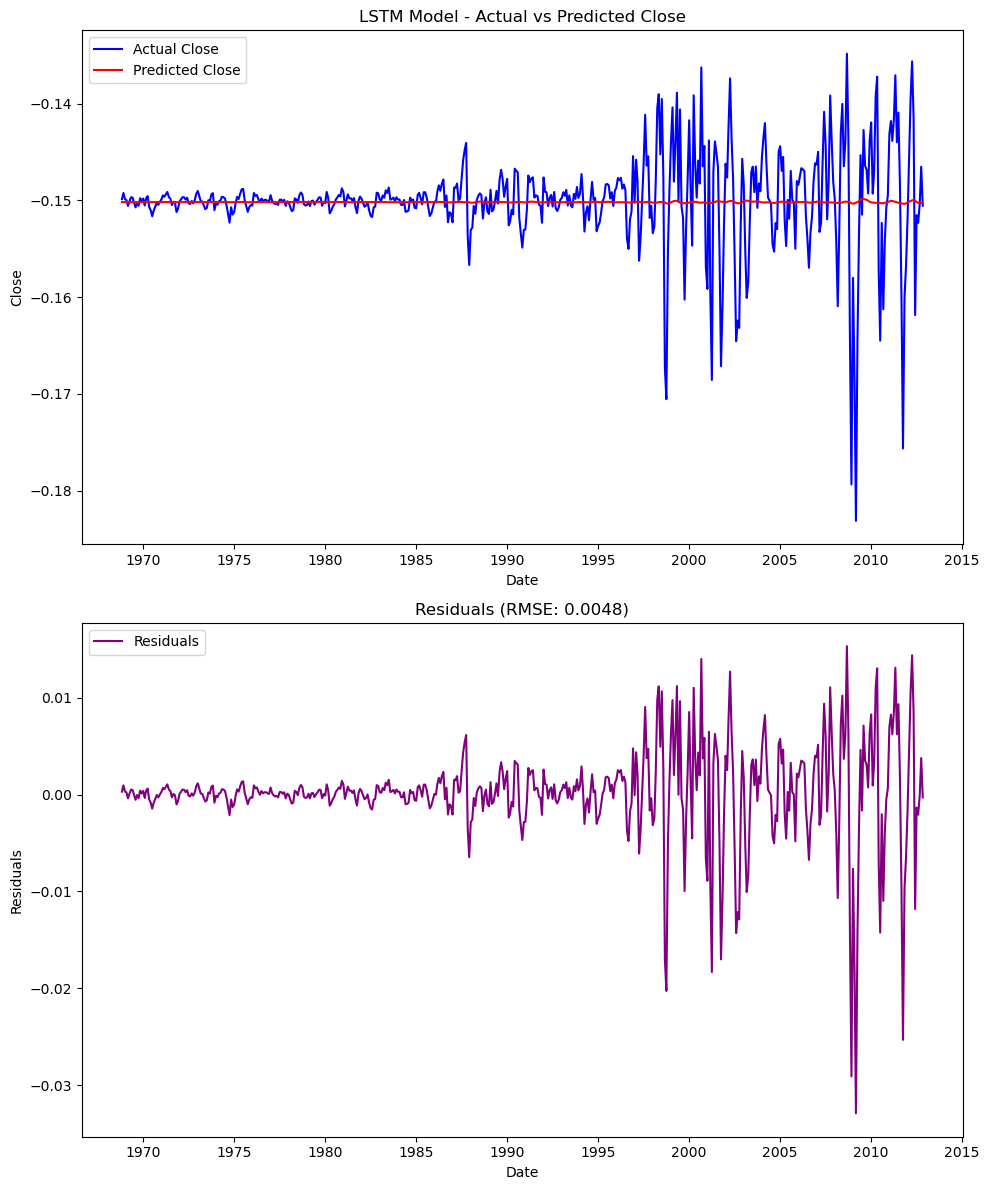

In [36]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

axs[0].plot(diff_rol_mean.index[-len(actual):], actual, color='blue', label='Actual Close')
axs[0].plot(diff_rol_mean.index[-len(predictions):], predictions, color='red', label='Predicted Close')
axs[0].set_title('LSTM Model - Actual vs Predicted Close')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Close')
axs[0].legend()

axs[1].plot(diff_rol_mean.index[-len(residuals):], residuals, color='purple', label='Residuals')
axs[1].set_title(f'Residuals (RMSE: {rmse:.4f})')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Residuals')
axs[1].legend()

plt.tight_layout()
plt.show()

In [37]:
import sqlite3
import pickle

serialized_y_test = pickle.dumps(actual)
serialized_y_pred = pickle.dumps(predictions)
serialized_residuals = pickle.dumps(residuals)
serialized_rmse = pickle.dumps(rmse)

conn = sqlite3.connect('DM_Project.db')
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS LSTM_plot (
                    id INTEGER PRIMARY KEY,
                    y_test BLOB,
                    y_pred BLOB,
                    residuals BLOB,
                    rmse BLOB)''')

cursor.execute("INSERT INTO LSTM_plot (y_test, y_pred, residuals, rmse) VALUES (?, ?, ?, ?)",
               (serialized_y_test, serialized_y_pred, serialized_residuals, serialized_rmse))

conn.commit()
conn.close()

In [38]:
import shutil

original_db_path = "DM_Project.db"
backup_db_path = "DM_Project_Saved.db"  

shutil.copyfile(original_db_path, backup_db_path)

print("Database saved successfully as:", backup_db_path)

Database saved successfully as: DM_Project_Saved.db


## Future Forecasting:

In [78]:
# Future predictions
def predict_future(model, data, seq_length, n_future):
    future_predictions = []
    current_sequence = data[-seq_length:]

    for _ in range(n_future):
        current_sequence_reshaped = current_sequence[np.newaxis, :, np.newaxis]
        prediction = model.predict(current_sequence_reshaped)
        future_predictions.append(prediction[0, 0])
        current_sequence = np.append(current_sequence[1:], prediction, axis=0)

    return np.array(future_predictions)

# Number of future predictions to make
n_future = 12 

# Making future predictions
future_predictions_scaled = predict_future(model, scaled_data, seq_length, n_future)
future_predictions = scaler.inverse_transform(future_predictions_scaled.reshape(-1, 1))

In [80]:
# Plotting historical and future predictions
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Close'], label='Historical Data')
future_dates = pd.date_range(start=df.index[-1], periods=n_future+1, freq='M')[1:]
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')
plt.title('LSTM Model - Historical and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

In [81]:
import sqlite3
import pickle

serialized_future_predictions = pickle.dumps(future_predictions)

conn = sqlite3.connect('DM_Project.db')
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS LSTM_Future_Predictions (
                    id INTEGER PRIMARY KEY,
                    future_predictions BLOB)''')

cursor.execute("INSERT INTO LSTM_Future_Predictions (future_predictions) VALUES (?)",
               (serialized_future_predictions,))

conn.commit()
conn.close()

print("Future predictions have been successfully stored in the SQLite database.")

In [82]:
import shutil

original_db_path = "DM_Project.db"
backup_db_path = "DM_Project_Saved.db"  

shutil.copyfile(original_db_path, backup_db_path)

print("Database saved successfully as:", backup_db_path)

Database saved successfully as: DM_Project_Saved.db


# Hybrid Models Integration

In [31]:
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Defining the index or timestamp to split the data
split_index = 0.8  

# Splitting the data
train_data = diff_rol_mean['Close'][:int(split_index * len(diff_rol_mean))]
test_data = diff_rol_mean['Close'][int(split_index * len(diff_rol_mean)):]

# Training the ARIMA model
arima_model = ARIMA(train_data, order=(1, 1, 0))
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=len(test_data))

# Calculating residuals
arima_residuals = test_data.values - arima_forecast
arima_residuals

C:\Users\wasif\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1968-10-01    0.001783
1968-11-01    0.001435
1968-12-01    0.004366
1969-01-01    0.001539
1969-02-01    0.000946
                ...   
2012-07-01   -0.006076
2012-08-01   -0.009668
2012-09-01   -0.000833
2012-10-01    0.016719
2012-11-01   -0.001653
Freq: MS, Name: predicted_mean, Length: 530, dtype: float64

In [33]:
# Preparing features for ANN (including ARIMA residuals)
X_ann = diff_rol_mean[['Year', 'Month']].values
X_ann_scaled = StandardScaler().fit_transform(X_ann)
X_ann_train = X_ann_scaled[:int(split_index * len(diff_rol_mean))]
X_ann_test = X_ann_scaled[int(split_index * len(diff_rol_mean)):]

# Defining the ANN model architecture
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_ann_train.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

C:\Users\wasif\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
X_ann_train_adjusted = X_ann_train[len(X_ann_train) - len(arima_residuals):]

# Compiling the ANN model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Training the ANN model on adjusted residuals and adjusted features
ann_model.fit(X_ann_train_adjusted, arima_residuals, epochs=100, batch_size=64, verbose=1)

# Predicting residuals using the ANN model
ann_residuals = ann_model.predict(X_ann_test)

# Combining ARIMA forecast and ANN residuals to obtain final forecast
hybrid_forecast = arima_forecast + ann_residuals.flatten()

# Calculating RMSE for the hybrid forecast
rmse_hybrid = np.sqrt(mean_squared_error(test_data, hybrid_forecast))
print('Hybrid Model RMSE:', rmse_hybrid)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0070
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038 
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024 
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019 
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016 
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.4704e-04 
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.2988e-04 
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8828e-04
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8168e-04 
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8710e-04 
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0963e-0

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5822e-04 
Epoch 81/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1275e-04 
Epoch 82/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9317e-04
Epoch 83/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2932e-04 
Epoch 84/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3486e-04 
Epoch 85/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6938e-04 
Epoch 86/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5492e-04 
Epoch 87/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5779e-04 
Epoch 88/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3448e-04 
Epoch 89/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0437e-04 
Epoch 90/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3254e-04 
Epoch 91/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0743e-04 
Epoch 92/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1301e-04 
Epoch 93/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.8757e-04 
Epoch 94/100
9/9 ━━━━━━━━━━━━━━━━━

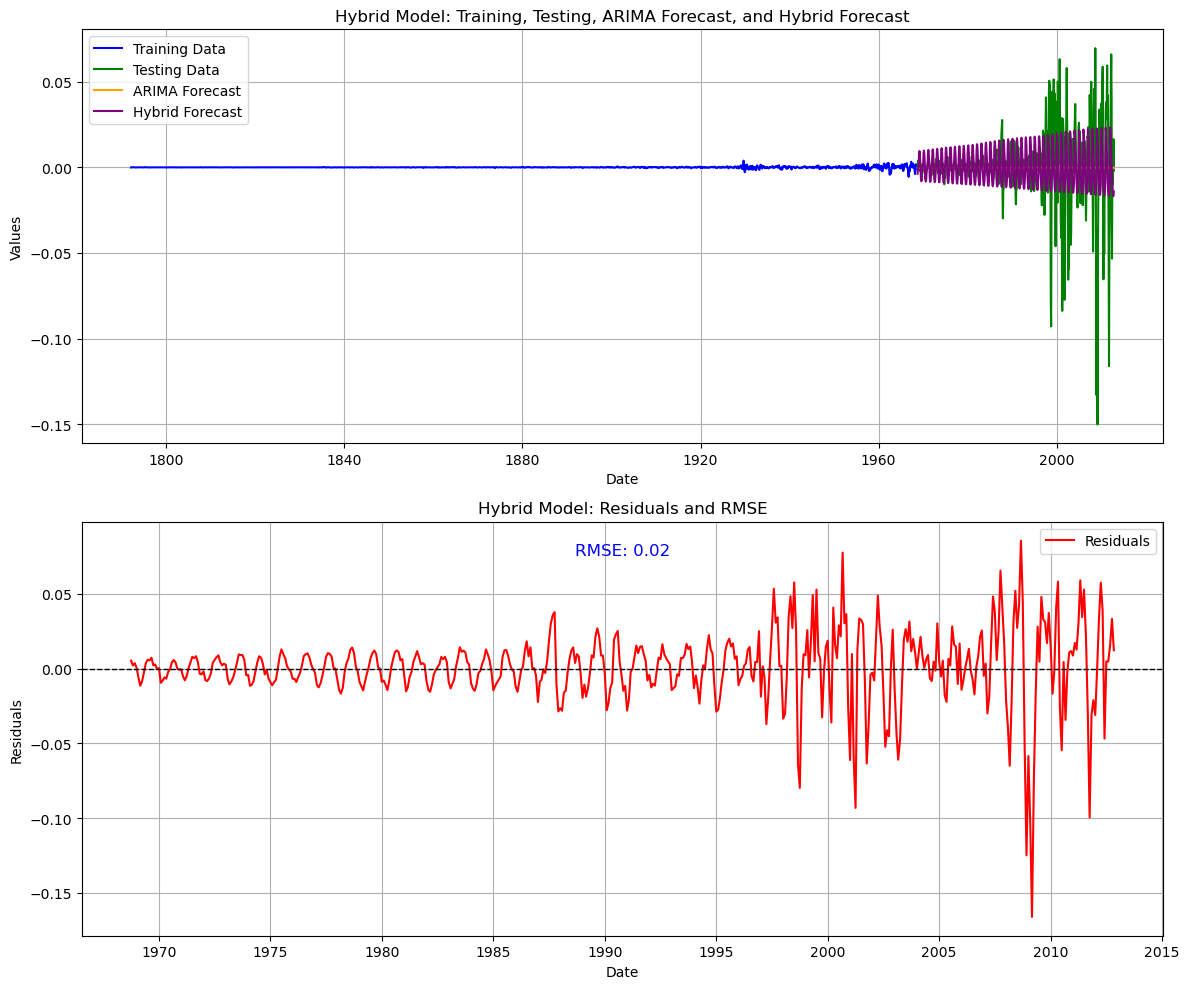

In [35]:
# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plotting training data
ax1.plot(train_data.index, train_data.values, label='Training Data', color='blue')

# Plotting testing data
ax1.plot(test_data.index, test_data.values, label='Testing Data', color='green')

# Plotting ARIMA forecast
ax1.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='orange')

# Plotting hybrid forecast
ax1.plot(test_data.index, hybrid_forecast, label='Hybrid Forecast', color='purple')

# Adding labels and legend for the first subplot
ax1.set_title('Hybrid Model: Training, Testing, ARIMA Forecast, and Hybrid Forecast')
ax1.set_xlabel('Date')
ax1.set_ylabel('Values')
ax1.legend()
ax1.grid(True)

# Plotting residuals
ax2.plot(test_data.index, test_data.values - hybrid_forecast, label='Residuals', color='red')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)

# Adding RMSE value to the plot
ax2.text(0.5, 0.95, f'RMSE: {rmse_hybrid:.2f}', horizontalalignment='center', verticalalignment='top', transform=ax2.transAxes, fontsize=12, color='blue')

# Adding labels and legend for the second subplot
ax2.set_title('Hybrid Model: Residuals and RMSE')
ax2.set_xlabel('Date')
ax2.set_ylabel('Residuals')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


In [38]:
import sqlite3
import pickle

conn = sqlite3.connect('DM_Project.db')
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS hybrid_plot (
                    id INTEGER PRIMARY KEY,
                    train_data BLOB,
                    test_data BLOB,
                    arima_forecast BLOB,
                    hybrid_forecast BLOB,
                    residuals BLOB,
                    rmse FLOAT)''')

serialized_train_data = pickle.dumps(train_data)
serialized_test_data = pickle.dumps(test_data)
serialized_arima_forecast = pickle.dumps(arima_forecast)
serialized_hybrid_forecast = pickle.dumps(hybrid_forecast)
serialized_residuals = pickle.dumps(test_data.values - hybrid_forecast)
rmse_hybrid = np.sqrt(mean_squared_error(test_data, hybrid_forecast))

cursor.execute("INSERT INTO hybrid_plot (train_data, test_data, arima_forecast, hybrid_forecast, residuals, rmse) VALUES (?, ?, ?, ?, ?, ?)",
               (serialized_train_data, serialized_test_data, serialized_arima_forecast, serialized_hybrid_forecast, serialized_residuals, rmse_hybrid))

conn.commit()
conn.close()

In [39]:
import shutil

original_db_path = "DM_Project.db"
backup_db_path = "DM_Project_Saved.db"  

shutil.copyfile(original_db_path, backup_db_path)

print("Database saved successfully as:", backup_db_path)

Database saved successfully as: DM_Project_Saved.db


## Future Forecasting:

In [41]:
# Training the ARIMA model on the entire dataset
arima_model = ARIMA(diff_rol_mean['Close'], order=(1, 1, 0))
arima_model_fit = arima_model.fit()

# Forecasting future ARIMA values
future_arima_forecast = arima_model_fit.forecast(steps=len(diff_rol_mean))

# Preparing features for ANN (including future timestamps)
future_timestamps = pd.date_range(start=diff_rol_mean.index[-1], periods=len(diff_rol_mean) + 1, freq='M')[1:]
future_X_ann = np.column_stack((future_timestamps.year, future_timestamps.month))
future_X_ann_scaled = StandardScaler().fit_transform(future_X_ann)

# Predicting future residuals using the ANN model
future_ann_residuals = ann_model.predict(future_X_ann_scaled)

# Combining future ARIMA forecast and ANN residuals to obtain final future forecast
future_hybrid_forecast = future_arima_forecast + future_ann_residuals.flatten()

68/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

C:\Users\wasif\AppData\Local\Temp\ipykernel_10540\1940083297.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_timestamps = pd.date_range(start=diff_rol_mean.index[-1], periods=len(diff_rol_mean) + 1, freq='M')[1:]


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


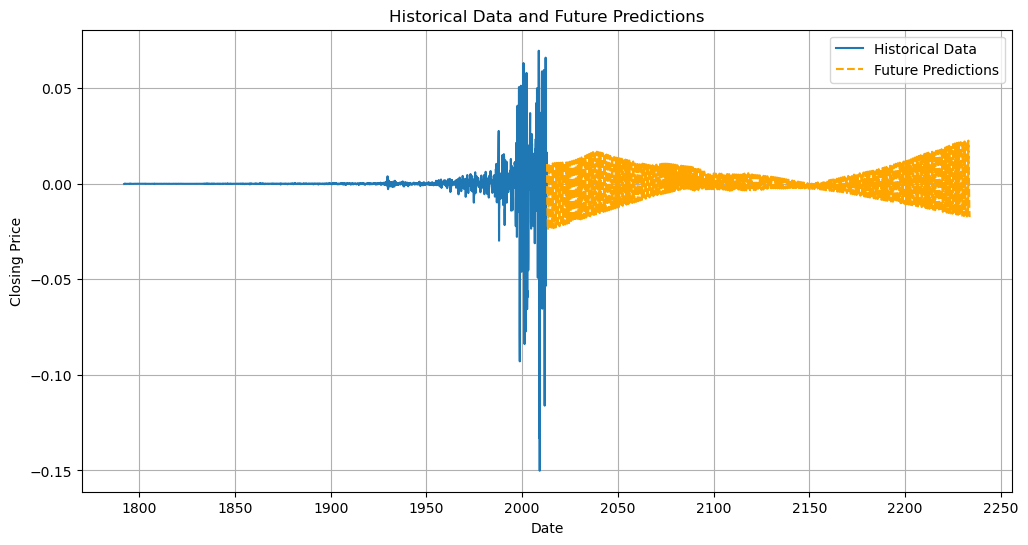

In [42]:
# Plotting historical data and future forecast
plt.figure(figsize=(12, 6))
plt.plot(diff_rol_mean.index, diff_rol_mean['Close'], label='Historical Data')
plt.plot(future_timestamps, future_hybrid_forecast, label='Future Predictions', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Historical Data and Future Predictions')
plt.legend()
plt.grid(True)
plt.show()


In [45]:
import sqlite3
import pickle

serialized_diff_rol_mean_index = pickle.dumps(diff_rol_mean.index)
serialized_future_timestamps = pickle.dumps(future_timestamps)
serialized_future_hybrid_forecast = pickle.dumps(future_hybrid_forecast)
serialized_dataframe = pickle.dumps(diff_rol_mean)

conn = sqlite3.connect('DM_Project.db')
cursor = conn.cursor()

cursor.execute('''CREATE TABLE IF NOT EXISTS Hybrid_forecasted (
                    id INTEGER PRIMARY KEY,
                    diff_rol_mean_index BLOB,
                    future_timestamps BLOB,
                    future_hybrid_forecast BLOB,
                    dataframe BLOB)''')

cursor.execute("INSERT INTO Hybrid_forecasted (diff_rol_mean_index, future_timestamps, future_hybrid_forecast, dataframe) VALUES (?, ?, ?, ?)",
               (serialized_diff_rol_mean_index, serialized_future_timestamps, serialized_future_hybrid_forecast, serialized_dataframe))

conn.commit()
conn.close()

In [46]:
import shutil

original_db_path = "DM_Project.db"
backup_db_path = "DM_Project_Saved.db"  

shutil.copyfile(original_db_path, backup_db_path)

print("Database saved successfully as:", backup_db_path)

Database saved successfully as: DM_Project_Saved.db
